In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
%matplotlib inline

## Data reading and prep

In [5]:
obsim_mm_means_df = pd.read_csv('../analysis_exp9_tandem05_nodischadj/mmdata/obsim_mm_means_df.csv', index_col=0)
obsim_mm_means_df

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,...,condmeantime_blockedbyldr_approx,condmeantime_blockedbyldr_sim,condmeantime_blockedbypp_approx,condmeantime_blockedbypp_sim,ldr_effmean_svctime_approx,ldr_effmean_svctime_sim,prob_blockedby_ldr_approx,prob_blockedby_ldr_sim,prob_blockedby_pp_approx,prob_blockedby_pp_sim
1,1,0.20,0.999950,0.950000,0.950000,2.739726,0.1,0.5,0.5,2,...,3.777411,3.302721,6.360755,6.401959,11.910124,11.915456,0.055045,0.051427,2.319907e-02,0.021741
2,2,0.20,0.999950,0.950000,0.850000,2.739726,0.1,0.5,0.5,2,...,4.025554,4.516602,8.685350,8.924706,12.465833,12.460024,0.063434,0.064167,1.037940e-01,0.096679
3,3,0.20,0.999950,0.950000,0.750000,2.739726,0.1,0.5,0.5,2,...,4.480172,6.928997,11.090321,11.186948,13.419348,13.264692,0.079524,0.086926,2.001325e-01,0.186347
4,4,0.20,0.999950,0.850000,0.950000,2.739726,0.1,0.5,0.5,2,...,5.222543,4.409709,6.360755,6.459064,11.252472,11.513514,0.165739,0.162672,2.319907e-02,0.021980
5,5,0.20,0.999950,0.850000,0.850000,2.739726,0.1,0.5,0.5,2,...,5.581905,5.217347,8.685350,8.377886,11.706673,11.877527,0.181751,0.176401,1.037940e-01,0.098517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,0.25,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.000000,1.351404,0.000000,11.999993,12.008200,0.000009,0.000000,1.235314e-08,0.000000
147,147,0.30,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,...,0.729366,0.050268,1.328353,0.000000,11.999993,12.008225,0.000009,0.000009,1.933882e-09,0.000000
148,148,0.20,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.043137,1.184546,0.000000,11.999996,12.002392,0.000006,0.000003,1.769363e-08,0.000000
149,149,0.25,0.999995,0.999995,0.999995,24.657534,0.1,0.5,0.5,2,...,0.639653,0.047906,1.158626,0.000000,11.999996,12.003488,0.000006,0.000004,2.147217e-09,0.000000


In [6]:
obsim_mm_means_df.columns.to_list()

['scenario',
 'tot_c_rate',
 'acc_tar_obs',
 'acc_tar_ldr',
 'acc_tar_pp',
 'daily_arr_rate',
 'alos_obs',
 'alos_ldr_1',
 'alos_ldr_2',
 'alos_pp_noc',
 'alos_pp_c',
 'load_obs',
 'load_ldr',
 'load_pp',
 'cap_obs',
 'cap_ldr',
 'cap_pp',
 'lam_obs',
 'lam_ldr',
 'lam_pp',
 'alos_ldr',
 'alos_pp',
 'rho_obs',
 'rho_ldr',
 'rho_pp',
 'cv2_obs',
 'cv2_ldr',
 'cv2_pp',
 'num_visits_obs_mean',
 'num_visits_ldr_mean',
 'num_visits_pp_mean',
 'num_visits_csect_mean',
 'planned_los_mean_mean_obs',
 'planned_los_mean_mean_ldr',
 'planned_los_mean_mean_pp',
 'planned_los_mean_mean_csect',
 'actual_los_mean_mean_obs',
 'actual_los_mean_mean_ldr',
 'actual_los_mean_mean_pp',
 'actual_los_mean_mean_csect',
 'planned_los_cv2_mean_obs',
 'planned_los_cv2_mean_ldr',
 'planned_los_cv2_mean_pp',
 'planned_los_cv2_mean_csect',
 'actual_los_cv2_mean_obs',
 'actual_los_cv2_mean_ldr',
 'actual_los_cv2_mean_pp',
 'actual_los_cv2_mean_csect',
 'planned_los_skew_mean_obs',
 'planned_los_skew_mean_ldr',
 'pla

In [7]:
check_blocking_cols = ['mean_blocked_by_pp_mean', 'condmeantime_blockedbypp_sim', 
                       'prob_blockedby_pp_sim', 'prob_blockedby_pp_approx', 'prob_blockedby_ldr_approx']
obsim_mm_means_df.loc[:, check_blocking_cols]

,mean_blocked_by_pp_mean,condmeantime_blockedbypp_sim,prob_blockedby_pp_sim,prob_blockedby_pp_approx,prob_blockedby_ldr_approx
1,6.401959,6.401959,0.021741,2.319907e-02,0.055045
2,8.924706,8.924706,0.096679,1.037940e-01,0.063434
3,11.186948,11.186948,0.186347,2.001325e-01,0.079524
4,6.459064,6.459064,0.021980,2.319907e-02,0.165739
5,8.377886,8.377886,0.098517,1.037940e-01,0.181751
...,...,...,...,...,...
146,0.000000,0.000000,0.000000,1.235314e-08,0.000009
147,0.000000,0.000000,0.000000,1.933882e-09,0.000009
148,0.000000,0.000000,0.000000,1.769363e-08,0.000006
149,0.000000,0.000000,0.000000,2.147217e-09,0.000006


In [8]:
[c for c in obsim_mm_means_df.columns.to_list() if '_pp' in c]

['acc_tar_pp',
 'alos_pp_noc',
 'alos_pp_c',
 'load_pp',
 'cap_pp',
 'lam_pp',
 'alos_pp',
 'rho_pp',
 'cv2_pp',
 'num_visits_pp_mean',
 'planned_los_mean_mean_pp',
 'actual_los_mean_mean_pp',
 'planned_los_cv2_mean_pp',
 'actual_los_cv2_mean_pp',
 'planned_los_skew_mean_pp',
 'actual_los_skew_mean_pp',
 'planned_los_kurt_mean_pp',
 'actual_los_kurt_mean_pp',
 'iatime_mean_mean_pp',
 'iatime_sd_mean_pp',
 'iatime_skew_mean_pp',
 'iatime_kurt_mean_pp',
 'mean_pct_blocked_by_pp',
 'mean_blocked_by_pp_mean',
 'mean_blocked_by_pp_p95',
 'occ_mean_mean_pp',
 'occ_mean_p75_pp',
 'occ_mean_p95_pp',
 'occ_mean_var_pp',
 'util_pp',
 'prob_blockedby_pp_approx',
 'prob_blockedby_pp_sim']

In [9]:
obsim_mm_means_df.iloc[-15:, :20]

,scenario,tot_c_rate,acc_tar_obs,acc_tar_ldr,acc_tar_pp,daily_arr_rate,alos_obs,alos_ldr_1,alos_ldr_2,alos_pp_noc,alos_pp_c,load_obs,load_ldr,load_pp,cap_obs,cap_ldr,cap_pp,lam_obs,lam_ldr,lam_pp
136,136,0.20,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.027397,5,9,22,2.739726,2.739726,2.739726
137,137,0.25,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.164384,5,9,22,2.739726,2.739726,2.739726
138,138,0.30,0.999995,0.999995,0.999995,2.739726,0.1,0.5,0.5,2,3,0.273973,1.369863,6.301370,5,9,23,2.739726,2.739726,2.739726
139,139,0.20,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.082192,7,16,45,8.219178,8.219178,8.219178
140,140,0.25,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.493151,7,16,46,8.219178,8.219178,8.219178
141,141,0.30,0.999995,0.999995,0.999995,8.219178,0.1,0.5,0.5,2,3,0.821918,4.109589,18.904110,7,16,48,8.219178,8.219178,8.219178
142,142,0.20,0.999995,0.999995,0.999995,13.698630,0.1,0.5,0.5,2,3,1.369863,6.849315,30.136986,9,21,65,13.698630,13.698630,13.698630
143,143,0.25,0.999995,0.999995,0.999995,13.698630,0.1,0.5,0.5,2,3,1.369863,6.849315,30.821918,9,21,68,13.698630,13.698630,13.698630
144,144,0.30,0.999995,0.999995,0.999995,13.698630,0.1,0.5,0.5,2,3,1.369863,6.849315,31.506849,9,21,70,13.698630,13.698630,13.698630
145,145,0.20,0.999995,0.999995,0.999995,19.178082,0.1,0.5,0.5,2,3,1.917808,9.589041,42.191781,11,26,84,19.178082,19.178082,19.178082


In [10]:
obsim_mm_means_df.loc[:, ['lam_obs', 'lam_ldr', 'lam_pp']]

,lam_obs,lam_ldr,lam_pp
1,2.739726,2.739726,2.739726
2,2.739726,2.739726,2.739726
3,2.739726,2.739726,2.739726
4,2.739726,2.739726,2.739726
5,2.739726,2.739726,2.739726
...,...,...,...
146,19.178082,19.178082,19.178082
147,19.178082,19.178082,19.178082
148,24.657534,24.657534,24.657534
149,24.657534,24.657534,24.657534


In [11]:
obsim_mm_means_df.loc[:, ['alos_ldr_1', 'alos_ldr_2']]

,alos_ldr_1,alos_ldr_2
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
...,...,...
146,0.5,0.5
147,0.5,0.5
148,0.5,0.5
149,0.5,0.5


In [12]:
X_pp_noq_cols = ['lam_obs', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                      'tot_c_rate', 'cap_pp']

X_ldr_noq_cols = ['lam_obs', 'alos_obs', 'alos_ldr', 'cap_ldr', 
                                      'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                      'tot_c_rate', 'cap_pp']

X_obs_noq_cols = ['lam_obs', 'alos_obs', 'cap_obs', 'alos_ldr', 'cap_ldr', 
                                      'alos_pp', 'alos_pp_noc', 'alos_pp_c', 
                                      'tot_c_rate', 'cap_pp']

X_pp_q_cols = X_pp_noq_cols.copy()
X_pp_q_cols.extend(['load_pp', 'rho_pp'])

X_ldr_q_cols = X_ldr_noq_cols.copy()
X_ldr_q_cols.extend(['load_ldr', 'rho_ldr', 'load_pp', 
                            'rho_pp', 'prob_blockedby_pp_approx', 'condmeantime_blockedbypp_approx',
                            'prob_blockedby_ldr_approx', 'ldr_effmean_svctime_approx'])

X_obs_q_cols = X_obs_noq_cols.copy()
X_obs_q_cols.extend(['load_obs', 'rho_obs', 
                     'prob_blockedby_ldr_approx', 'condmeantime_blockedbyldr_approx',
                   'load_ldr', 'rho_ldr', 'load_pp', 
                            'rho_pp', 'prob_blockedby_pp_approx', 'condmeantime_blockedbypp_approx'])

In [13]:
# PP has no downstream units and its LOS is unaffected by any upstream units
X_pp_noq = obsim_mm_means_df.loc[:, X_pp_noq_cols]

# LDR has PP downstream which can block it and OBS upstream which can modify the LDR length of stay
X_ldr_noq = obsim_mm_means_df.loc[:, X_ldr_noq_cols]

# OBS has both LDR and PP downstream (this leads to OBS and LDR having same set of base X columns)
X_obs_noq = obsim_mm_means_df.loc[:, X_obs_noq_cols]



In [14]:
# Augment X matrices with queueing related fields

# PP
X_pp_q = obsim_mm_means_df.loc[:, X_pp_q_cols]
X_pp_q['sqrt_load_pp'] = X_pp_q['load_pp'] ** 0.5

# LDR
X_ldr_q = obsim_mm_means_df.loc[:, X_ldr_q_cols]
X_ldr_q['sqrt_load_ldr'] = X_ldr_q['load_ldr'] ** 0.5
X_ldr_q['sqrt_load_pp'] = X_ldr_q['load_pp'] ** 0.5

# OBS
X_obs_q = obsim_mm_means_df.loc[:, X_obs_q_cols]
X_obs_q['sqrt_load_obs'] = X_obs_q['load_obs'] ** 0.5
X_obs_q['sqrt_load_ldr'] = X_obs_q['load_ldr'] ** 0.5
X_obs_q['sqrt_load_pp'] = X_obs_q['load_pp'] ** 0.5

# y vectors
y_pp_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_pp']
y_pp_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_pp']
y_ldr_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_ldr']
y_ldr_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_ldr']
y_obs_occ_mean = obsim_mm_means_df.loc[:, 'occ_mean_mean_obs']
y_obs_occ_p95 = obsim_mm_means_df.loc[:, 'occ_mean_p95_obs']

y_mean_pct_blocked_by_pp = obsim_mm_means_df.loc[:, 'mean_pct_blocked_by_pp']
y_mean_pct_blocked_by_ldr = obsim_mm_means_df.loc[:, 'mean_pct_waitq_ldr']
y_condmeantime_blockedbyldr_sim = obsim_mm_means_df.loc[:, 'condmeantime_blockedbyldr_sim']
y_condmeantime_blockedbypp_sim = obsim_mm_means_df.loc[:, 'condmeantime_blockedbypp_sim']
y_ldr_effmean_svctime_sim = obsim_mm_means_df.loc[:, 'ldr_effmean_svctime_sim']

In [15]:
X_ldr_q.iloc[-15:, :20]

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
136,2.739726,0.1,0.5,9,2.20,2,3,0.20,22,1.369863,0.152207,6.027397,0.273973,4.300025e-07,3.774664,0.000014,11.999978,1.170411,2.455076
137,2.739726,0.1,0.5,9,2.25,2,3,0.25,22,1.369863,0.152207,6.164384,0.280199,6.200629e-07,3.841017,0.000014,11.999978,1.170411,2.482818
138,2.739726,0.1,0.5,9,2.30,2,3,0.30,23,1.369863,0.152207,6.301370,0.273973,2.381808e-07,3.822494,0.000014,11.999977,1.170411,2.510253
139,8.219178,0.1,0.5,16,2.20,2,3,0.20,45,4.109589,0.256849,18.082192,0.401826,7.390317e-08,2.109892,0.000007,11.999993,2.027212,4.252316
140,8.219178,0.1,0.5,16,2.25,2,3,0.25,46,4.109589,0.256849,18.493151,0.402025,5.417211e-08,2.122492,0.000007,11.999993,2.027212,4.300366
141,8.219178,0.1,0.5,16,2.30,2,3,0.30,48,4.109589,0.256849,18.904110,0.393836,1.542585e-08,2.103835,0.000007,11.999993,2.027212,4.347886
142,13.698630,0.1,0.5,21,2.20,2,3,0.20,65,6.849315,0.326158,30.136986,0.463646,2.554934e-08,1.602491,0.000011,11.999991,2.617120,5.489716
143,13.698630,0.1,0.5,21,2.25,2,3,0.25,68,6.849315,0.326158,30.821918,0.453263,5.301905e-09,1.581298,0.000011,11.999991,2.617120,5.551749
144,13.698630,0.1,0.5,21,2.30,2,3,0.30,70,6.849315,0.326158,31.506849,0.450098,2.434485e-09,1.580926,0.000011,11.999991,2.617120,5.613096
145,19.178082,0.1,0.5,26,2.20,2,3,0.20,84,9.589041,0.368809,42.191781,0.502283,9.508587e-09,1.330848,0.000009,11.999993,3.096618,6.495520


In [16]:
y_pp_occ_mean

1       6.050726
2       6.017481
3       6.020065
4       6.021286
5       6.031431
         ...    
146    43.271001
147    44.317859
148    54.370029
149    55.673771
150    56.982402
Name: occ_mean_mean_pp, Length: 150, dtype: float64

In [17]:
X_pp_noq

,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp
1,2.739726,2.20,2,3,0.20,12
2,2.739726,2.20,2,3,0.20,10
3,2.739726,2.20,2,3,0.20,9
4,2.739726,2.20,2,3,0.20,12
5,2.739726,2.20,2,3,0.20,10
...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85
147,19.178082,2.30,2,3,0.30,89
148,24.657534,2.20,2,3,0.20,100
149,24.657534,2.25,2,3,0.25,105


In [18]:
X_pp_q

,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
1,2.739726,2.20,2,3,0.20,12,6.027397,0.502283,2.455076
2,2.739726,2.20,2,3,0.20,10,6.027397,0.602740,2.455076
3,2.739726,2.20,2,3,0.20,9,6.027397,0.669711,2.455076
4,2.739726,2.20,2,3,0.20,12,6.027397,0.502283,2.455076
5,2.739726,2.20,2,3,0.20,10,6.027397,0.602740,2.455076
...,...,...,...,...,...,...,...,...,...
146,19.178082,2.25,2,3,0.25,85,43.150685,0.507655,6.568918
147,19.178082,2.30,2,3,0.30,89,44.109589,0.495613,6.641505
148,24.657534,2.20,2,3,0.20,100,54.246575,0.542466,7.365227
149,24.657534,2.25,2,3,0.25,105,55.479452,0.528376,7.448453


## Model building
Let's set up a pipeline to make it easy to build and evaluate models.

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, KFold
from sklearn import metrics

## General function

**Note:** The `neg_` prefix in the scoring metric names indicates that it's the negative of MAE and MAPE. The reason for the negative sign is just so that during cross-validation, sklearn sorts results such that a higher score is better. Obviously, this isn't true for things like MAE, MSE, MAPE.

In [83]:
def fit_summarize_mm(scenario, X, y, flavor='lm',
                  scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
                  scale=False, fit_intercept=True, n_splits=5, kfold_shuffle=True, kfold_random_state=4,
                  return_train_score=True, return_estimator=True, 
                  lasso_alpha=1.0, lasso_max_iter=1000,
                  rf_random_state=0, rf_criterion='mae', rf_min_samples_split=10):

    # Create name label lists
    partitions = ['test', 'train']
    metric_names = [f"{p}_{s}" for s in scoring for p in partitions]
    var_names = X.columns.to_list()
    flavors_w_coeffs = ['lm', 'lasso', 'lassocv', 'poly']
    flavor_estimator ={'lm': 'linearregression',
                       'lasso': 'lasso',
                       'lassocv': 'lassocv',
                       'poly': 'linearregression',
                       'spline': 'linearregression'}

    steps = []
    if scale:
        steps.append(StandardScaler())
        
    # Create flavor specific pipelines    
    if flavor == 'lm':
        steps.extend([LinearRegression(fit_intercept=fit_intercept)])   
    elif flavor == 'lasso':
        steps.extend([Lasso(alpha=lasso_alpha, fit_intercept=fit_intercept, max_iter=lasso_max_iter)])
    elif flavor == 'lassocv':
        steps.extend([LassoCV(fit_intercept=fit_intercept, max_iter=lasso_max_iter)])
    elif flavor == 'rf':
        steps.extend([RandomForestRegressor(criterion=rf_criterion, oob_score=True, min_samples_split=rf_min_samples_split, random_state=rf_random_state)])
    elif flavor == 'svr':
        steps.extend([SVR()])
    elif flavor == 'nn':
        steps.extend([MLPRegressor(max_iter=2000)])
    elif flavor == 'poly':
        steps.extend([PolynomialFeatures(2), LinearRegression(fit_intercept=fit_intercept)])
    else:
        raise ValueError(f"Unknown flavor: {flavor}")
    
    model = make_pipeline(*steps)
    
    # Run the cross validation model fitting and testing
    if not kfold_shuffle:
        kfold_random_state = None
        
    cv_iterator = KFold(n_splits=n_splits, shuffle=kfold_shuffle, random_state=kfold_random_state)
    scores = cross_validate(model, X, y, scoring=scoring,
                            cv=cv_iterator, 
                            return_train_score=return_train_score, return_estimator=return_estimator)

    
    # Extract coefficients for relevant flavors
    if flavor in flavors_w_coeffs:
        coeffs = [list(estimator.named_steps[flavor_estimator[flavor]].coef_) for estimator in scores['estimator']]
        intercept = [estimator.named_steps[flavor_estimator[flavor]].intercept_ for estimator in scores['estimator']]
    
    # Trying to get feature names for poly
    if flavor == 'poly':
        poly_features = [list(estimator.named_steps['polynomialfeatures'].get_feature_names(var_names)) 
                         for estimator in scores['estimator']][0]

        print(poly_features)
        
        
        
    # Extract alphas for lassocv
    alphas = []
    if flavor == 'lassocv':        
        alphas = [estimator.named_steps['lassocv'].alpha_ for estimator in scores['estimator']]
    
    # Extract metrics
    metrics = {metric:scores[metric] for metric in metric_names}
    metrics_df = pd.DataFrame(metrics)
    
    # Create predictions
    predictions = cross_val_predict(model, X, y)
    
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.scatter(y, predictions)
    ax.axline((0,0), slope=1)
    ax.set_xlabel('actual')  # Add an x-label to the axes.
    ax.set_ylabel('predicted')  # Add a y-label to the axes.
    ax.set_title("cross_val_predict")  # Add a title to the axes.
    
    # Create flavor specific results dictionaries (e.g. rf doesn't have coeffs)
    if flavor in flavors_w_coeffs:
        # If poly, need to construct var_names
        if flavor == 'poly':
            poly_features = [list(estimator.named_steps['polynomialfeatures'].get_feature_names(var_names)) 
                         for estimator in scores['estimator']][0]
            
            # Change '1' to 'intercept'
            poly_features[0] = 'intercept'
            
            coeffs_df = pd.DataFrame(coeffs)
            x_shape = coeffs_df.shape
            coeffs_df['intercept'] = intercept
            
            # Reorder columns to get last column (intercept) to be first
            n_cols = coeffs_df.shape[1]
            new_col_order = [_ for _ in range(0, n_cols - 1)]
            new_col_order.insert(0, n_cols - 1)
            coeffs_df = coeffs_df.iloc[:, new_col_order]
            # Name the columns
            ceoffs.columns = poly_features
        else:
            coeffs_df = pd.DataFrame(coeffs, columns=var_names)
            x_shape = coeffs_df.shape
            coeffs_df['intercept'] = intercept
            # Reorder columns to get last column (intercept) to be first
            n_cols = coeffs_df.shape[1]
            new_col_order = [_ for _ in range(0, n_cols - 1)]
            new_col_order.insert(0, n_cols - 1)
            coeffs_df = coeffs_df.iloc[:, new_col_order]
            
        if scale:
            scaling_factors = np.array([list(estimator.named_steps['standardscaler'].scale_) for estimator in scores['estimator']]) 
        else:
            scaling_factors = np.ones(x_shape)
        
        # terms corresponding to features
        unscaled_coeffs_df1 = coeffs_df.iloc[:, 1:] / scaling_factors
        # intercept
        unscaled_coeffs_df2 = coeffs_df.iloc[:, [0]] 
        # Put them together with intercept as first column
        unscaled_coeffs_df = pd.concat([unscaled_coeffs_df2, unscaled_coeffs_df1], axis=1)


        results = {'scenario': scenario,
                   'coeffs_df': unscaled_coeffs_df,
                   'metrics_df': metrics_df,
                   'scaling': scaling_factors,
                   'scaled_coeffs_df': coeffs_df,
                   'alphas': alphas,
                   'predictions': predictions,
                   'plot': fig}
    else:
        results = {'scenario': scenario,
                   'metrics_df': metrics_df,
                   'predictions': predictions,
                   'plot': fig}
        
    return results


In [68]:
def prediction_scatter(y, predictions):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.scatter(y, predictions)
    ax.axline((0,0), slope=1)
    ax.set_xlabel('actual')  # Add an x-label to the axes.
    ax.set_ylabel('predicted')  # Add a y-label to the axes.
    ax.set_title("general predict vs actual scatter")  # Add a title to the axes.
    return fig

## Preliminary modeling test test fit_summarize_lm function
Let's build models for pp mean occupancy using q, noq, and load data. 

* linear regression with and without input scaling
* lasso

We want to make sure that our general analysis pipeline is working and that we can recover coefficients in unscaled form after using input scaling.

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,-0.440495,0.014290,0.154397,-1.110223e-16,8.326673e-17,0.154397,0.001196,0.993989,0.078557,0.008088
1,-0.568812,0.035723,0.190935,-3.330669e-16,1.665335e-16,0.190935,0.001708,0.983098,0.123553,0.012698
2,-0.383539,0.018184,0.132603,5.551115e-16,-2.498002e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,-0.475844,0.018118,0.160202,0.000000e+00,-2.775558e-17,0.160202,0.001317,0.991182,0.091316,0.015805
4,-0.479379,0.022000,0.165727,5.551115e-16,-2.775558e-17,0.165727,0.001590,0.990018,0.097166,0.007735


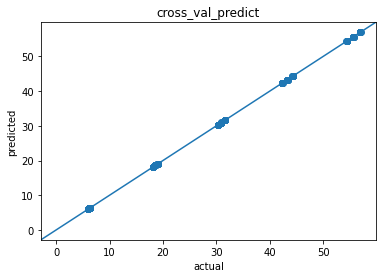

In [69]:
pp_occ_mean_q_lm_results = fit_summarize_mm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, scale=False, flavor='lm')
pp_occ_mean_q_lm_results['coeffs_df']

In [70]:
pp_occ_mean_q_lm_results['scaled_coeffs_df']

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,-0.440495,0.014290,0.154397,-1.110223e-16,8.326673e-17,0.154397,0.001196,0.993989,0.078557,0.008088
1,-0.568812,0.035723,0.190935,-3.330669e-16,1.665335e-16,0.190935,0.001708,0.983098,0.123553,0.012698
2,-0.383539,0.018184,0.132603,5.551115e-16,-2.498002e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,-0.475844,0.018118,0.160202,0.000000e+00,-2.775558e-17,0.160202,0.001317,0.991182,0.091316,0.015805
4,-0.479379,0.022000,0.165727,5.551115e-16,-2.775558e-17,0.165727,0.001590,0.990018,0.097166,0.007735


In [71]:
pp_occ_mean_q_lm_results['scaling']

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

If we scale the data, then returned coefficients are in scaled units. **UPDATE** Removed all code related to scaling y. While it wasn't the right approach, I did learn how to use the `TransformedTargetRegressor` class which can wrap a `Pipeline` object and do some y transformation such as log(y). 

https://stackoverflow.com/questions/31029340/how-to-adjust-scaled-scikit-learn-logicistic-regression-coeffs-to-score-a-non-sc

In [72]:
pp_occ_mean_q_lm_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.028836,-0.025057,-0.001010,-0.001035,0.999993,0.999997
1,-0.026055,-0.025493,-0.001483,-0.000913,0.999996,0.999996
2,-0.023516,-0.025958,-0.000903,-0.001058,0.999997,0.999996
3,-0.027501,-0.025378,-0.000908,-0.001063,0.999994,0.999996
4,-0.026845,-0.025633,-0.001064,-0.001025,0.999997,0.999996


### Analysis note
Obviously we can't really interpet some of the coefficients because they are related. We can't change the arrival rate or LOS without affecting load and rho.

Now let's do linear regression but with scaled X matrix.

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,30.537265,0.114786,0.006086,1.998401e-14,1.509903e-14,0.006086,0.031563,17.947534,0.008310,0.014730
1,32.459013,0.268108,0.007742,1.865175e-14,-3.552714e-15,0.007742,0.042104,16.606836,0.011598,0.021009
2,29.871882,0.139485,0.005512,-2.442491e-14,-8.881784e-16,0.005512,0.020649,17.143831,0.008041,0.014260
3,30.949432,0.143294,0.006700,2.708944e-14,-1.776357e-15,0.006700,0.033526,17.671902,0.009062,0.028130
4,30.814709,0.166525,0.006720,6.217249e-15,2.220446e-15,0.006720,0.038835,16.885637,0.009679,0.013220


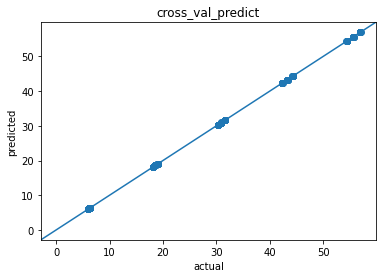

In [73]:
pp_occ_mean_q_lm_scaled_results = fit_summarize_mm('pp_occ_mean_q_lm', 
                                                   X_pp_q, y_pp_occ_mean, scale=True, flavor='lm')
pp_occ_mean_q_lm_scaled_results['scaled_coeffs_df']

As expected, the `load_pp` variable has dominating coefficient.

In [74]:
pp_occ_mean_q_lm_scaled_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.028836,-0.025057,-0.001010,-0.001035,0.999993,0.999997
1,-0.026055,-0.025493,-0.001483,-0.000913,0.999996,0.999996
2,-0.023516,-0.025958,-0.000903,-0.001058,0.999997,0.999996
3,-0.027501,-0.025378,-0.000908,-0.001063,0.999994,0.999996
4,-0.026845,-0.025633,-0.001064,-0.001025,0.999997,0.999996


In [75]:
print(pp_occ_mean_q_lm_scaled_results['scaling'])

[[ 8.03237751  0.03942072  1.          1.          0.03942072 26.38541132
  18.05606418  0.10577836  1.8212263 ]
 [ 7.50513262  0.04054961  1.          1.          0.04054961 24.65150294
  16.89235136  0.09387236  1.65451922]
 [ 7.67068926  0.04156446  1.          1.          0.04156446 25.06225582
  17.27116508  0.10265413  1.74529655]
 [ 7.9089078   0.0418247   1.          1.          0.0418247  25.45049115
  17.82912659  0.09924083  1.77980585]
 [ 7.56931096  0.04054961  1.          1.          0.04054961 24.42630072
  17.05589168  0.09961047  1.70897547]]


Divide coeffs by scaling factors to get coeffs on original scale.

In [77]:
pp_occ_mean_q_lm_scaled_results['scaled_coeffs_df'].iloc[:, 1:] / pp_occ_mean_q_lm_scaled_results['scaling']

,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,0.014290,0.154397,1.998401e-14,1.509903e-14,0.154397,0.001196,0.993989,0.078557,0.008088
1,0.035723,0.190935,1.865175e-14,-3.552714e-15,0.190935,0.001708,0.983098,0.123553,0.012698
2,0.018184,0.132603,-2.442491e-14,-8.881784e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,0.018118,0.160202,2.708944e-14,-1.776357e-15,0.160202,0.001317,0.991182,0.091316,0.015805
4,0.022000,0.165727,6.217249e-15,2.220446e-15,0.165727,0.001590,0.990018,0.097166,0.007735


In [78]:
pp_occ_mean_q_lm_scaled_results['coeffs_df']

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,30.537265,0.014290,0.154397,1.998401e-14,1.509903e-14,0.154397,0.001196,0.993989,0.078557,0.008088
1,32.459013,0.035723,0.190935,1.865175e-14,-3.552714e-15,0.190935,0.001708,0.983098,0.123553,0.012698
2,29.871882,0.018184,0.132603,-2.442491e-14,-8.881784e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,30.949432,0.018118,0.160202,2.708944e-14,-1.776357e-15,0.160202,0.001317,0.991182,0.091316,0.015805
4,30.814709,0.022000,0.165727,6.217249e-15,2.220446e-15,0.165727,0.001590,0.990018,0.097166,0.007735


In [79]:
pp_occ_mean_q_lm_results['coeffs_df']

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,-0.440495,0.014290,0.154397,-1.110223e-16,8.326673e-17,0.154397,0.001196,0.993989,0.078557,0.008088
1,-0.568812,0.035723,0.190935,-3.330669e-16,1.665335e-16,0.190935,0.001708,0.983098,0.123553,0.012698
2,-0.383539,0.018184,0.132603,5.551115e-16,-2.498002e-16,0.132603,0.000824,0.992627,0.078326,0.008170
3,-0.475844,0.018118,0.160202,0.000000e+00,-2.775558e-17,0.160202,0.001317,0.991182,0.091316,0.015805
4,-0.479379,0.022000,0.165727,5.551115e-16,-2.775558e-17,0.165727,0.001590,0.990018,0.097166,0.007735


**YES!!** The scaled coeffs divided by the scaling are equal to the unscaled coeffs.

## Lasso models for mean occ in pp
Now do lasso. We need to scale because it's lasso.

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,30.537265,0.117021,0.0,0.0,0.0,0.0,0.0,0.895620,0.0,0.0
1,32.459013,0.055541,0.0,0.0,0.0,0.0,0.0,0.919037,0.0,0.0
2,29.871882,0.071997,0.0,0.0,0.0,0.0,0.0,0.913029,0.0,0.0
3,30.949432,0.060693,0.0,0.0,0.0,0.0,0.0,0.919895,0.0,0.0
4,30.814709,0.082745,0.0,0.0,0.0,0.0,0.0,0.907719,0.0,0.0


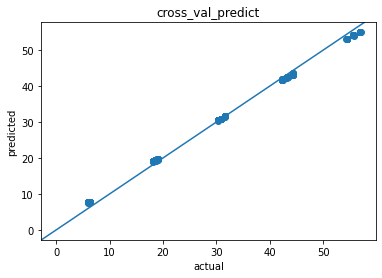

In [84]:
pp_occ_mean_q_lasso_results = fit_summarize_mm('pp_occ_mean_q_lasso', X_pp_q, y_pp_occ_mean, 
                                               scale=True, flavor='lasso', lasso_alpha=1.0, lasso_max_iter=2000)
pp_occ_mean_q_lasso_results['coeffs_df']


In [86]:
pp_occ_mean_q_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.650943,-0.874656,-0.032572,-0.066063,0.996877,0.996943
1,-1.041937,-0.858188,-0.111998,-0.056510,0.995872,0.996510
2,-0.936469,-0.854260,-0.049324,-0.063514,0.996319,0.996660
3,-0.745803,-0.862326,-0.052592,-0.062918,0.996849,0.996866
4,-0.985661,-0.847472,-0.071689,-0.061054,0.996634,0.996576


Interesting. We get slightly worse performance than the lm but have far fewer nonzero coefficients.


What if we build an unscaled model just with load. Should get a coeff somewhat close to 1.0 since mean occ in PP should be somewhat close to load.

,intercept,load_pp,sqrt_load_pp
0,-0.025597,1.001281,0.017520
1,-0.045786,1.000348,0.026293
2,-0.016215,1.001544,0.013404
3,-0.039730,1.000420,0.024987
4,-0.023462,1.001463,0.016000


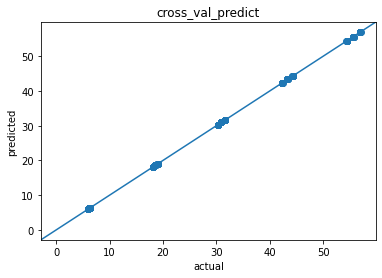

In [87]:
pp_occ_mean_load_results = fit_summarize_mm('pp_occ_mean_load', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_mean, 
                                               scale=False, flavor='lm')
pp_occ_mean_load_results['coeffs_df']


In [88]:
pp_occ_mean_load_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.028629,-0.025851,-0.001101,-0.001147,0.999993,0.999996
1,-0.025953,-0.026503,-0.001513,-0.001056,0.999996,0.999995
2,-0.025238,-0.026496,-0.001040,-0.001162,0.999996,0.999995
3,-0.028228,-0.025872,-0.001111,-0.001141,0.999994,0.999996
4,-0.026617,-0.026392,-0.001096,-0.001149,0.999997,0.999995


Let's try lasso to see what it does with the sqrt term.

,intercept,load_pp,sqrt_load_pp
0,30.537265,0.947647,0.0
1,32.459013,0.943695,0.0
2,29.871882,0.944983,0.0
3,30.949432,0.946799,0.0
4,30.814709,0.944417,0.0


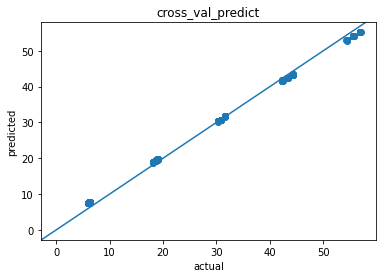

In [89]:
pp_occ_mean_load_lasso_results = fit_summarize_mm('pp_occ_mean_load_lasso', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_mean, 
                                               scale=True, flavor='lasso')
pp_occ_mean_load_lasso_results['coeffs_df']


In [90]:
pp_occ_mean_load_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.638779,-0.871963,-0.032118,-0.065929,0.996951,0.996947
1,-1.041054,-0.858142,-0.112050,-0.056523,0.995876,0.996511
2,-0.935339,-0.854295,-0.049305,-0.063573,0.996322,0.996662
3,-0.745954,-0.860557,-0.052604,-0.062885,0.996826,0.996868
4,-0.985767,-0.844833,-0.071774,-0.061022,0.996623,0.996579


Doesn't perform quite as well but only uses load. Since PP is an M/G/c queue, mean occ is not equal to load.

## Random forest for PP mean and p95 occ

How does rf do with the occ measures?

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.196118,-0.106648,-0.007434,-0.004622,0.999663,0.999915
1,-0.158879,-0.088649,-0.015011,-0.003869,0.999781,0.999929
2,-0.127553,-0.107932,-0.004013,-0.004782,0.999901,0.999912
3,-0.165956,-0.100246,-0.006976,-0.004026,0.999678,0.999926
4,-0.157295,-0.094103,-0.005844,-0.003926,0.999731,0.999936


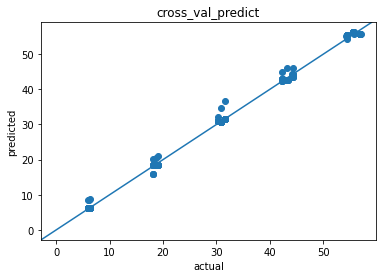

In [91]:
pp_occ_mean_q_rf_results = fit_summarize_mm('pp_occ_mean_q_rf', X_pp_q, y_pp_occ_mean, scale=False, flavor='rf')
pp_occ_mean_q_rf_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.276602,-0.114409,-0.011172,-0.004441,0.999048,0.999870
1,-0.264431,-0.108639,-0.031350,-0.006243,0.998828,0.999789
2,-0.198678,-0.142271,-0.006872,-0.005822,0.999669,0.999806
3,-0.285878,-0.128719,-0.012738,-0.005315,0.998688,0.999816
4,-0.151002,-0.122212,-0.006310,-0.005187,0.999782,0.999860


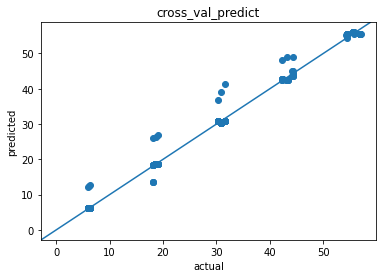

In [92]:
pp_occ_mean_noq_rf_results = fit_summarize_mm('pp_occ_mean_noq_rf', X_pp_noq, y_pp_occ_mean, scale=False, flavor='rf')
pp_occ_mean_noq_rf_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.277774,-0.166284,-0.011207,-0.007161,0.999451,0.999858
1,-0.408151,-0.168695,-0.030030,-0.007888,0.998897,0.999806
2,-0.264508,-0.199899,-0.007948,-0.008248,0.999656,0.999768
3,-0.390174,-0.182381,-0.015370,-0.007029,0.998155,0.999756
4,-0.215808,-0.181384,-0.009699,-0.007744,0.999830,0.999824


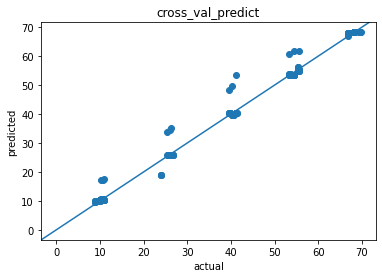

In [93]:
pp_occ_p95_noq_rf_results = fit_summarize_mm('pp_occ_p95_noq_rf', X_pp_noq, y_pp_occ_p95, scale=False, flavor='rf')
pp_occ_p95_noq_rf_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.196034,-0.146685,-0.007969,-0.007048,0.999769,0.999901
1,-0.327659,-0.161893,-0.023588,-0.007246,0.999491,0.999841
2,-0.198415,-0.159308,-0.005832,-0.006635,0.999860,0.999896
3,-0.249139,-0.146956,-0.010688,-0.005870,0.999405,0.999894
4,-0.209540,-0.172714,-0.010224,-0.007965,0.999848,0.999855


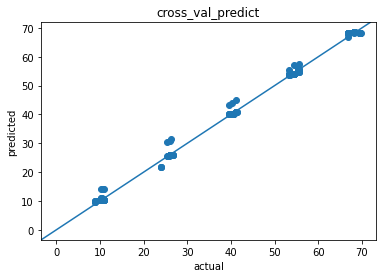

In [94]:
pp_occ_p95_q_rf_results = fit_summarize_mm('pp_occ_p95_q_rf', X_pp_q, y_pp_occ_p95, scale=False, flavor='rf')
pp_occ_p95_q_rf_results['metrics_df']

Clearly, the addition of queueing terms helped the random forest.

## Trying SVR for PP mean occ

Just going to use default C and epsilon for now.

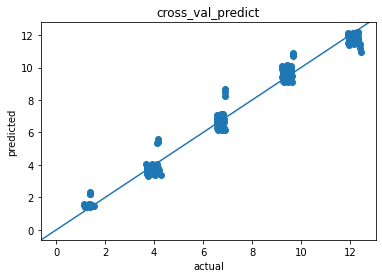

In [95]:
ldr_occ_mean_q_svr_results = fit_summarize_mm('ldr_occ_mean_q_svr', X_ldr_q, y_ldr_occ_mean, flavor='svr')



In [96]:
ldr_occ_mean_q_svr_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.303084,-0.273833,-0.050756,-0.063038,0.985864,0.991873
1,-0.263256,-0.295131,-0.102264,-0.062328,0.993069,0.988759
2,-0.306071,-0.275059,-0.057690,-0.061970,0.988925,0.990987
3,-0.353099,-0.289487,-0.068712,-0.066956,0.982935,0.989817
4,-0.299051,-0.282677,-0.065259,-0.061904,0.989567,0.990574


What if we don't use queueing?

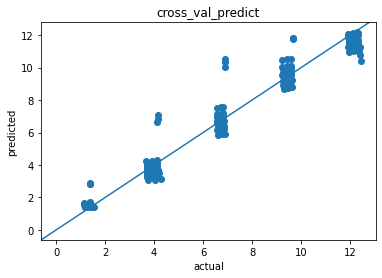

In [97]:
ldr_occ_mean_noq_svr_results = fit_summarize_mm('ldr_occ_mean_noq_svr', X_ldr_noq, y_ldr_occ_mean, flavor='svr')



In [98]:
ldr_occ_mean_noq_svr_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.496280,-0.497860,-0.081193,-0.111517,0.965834,0.961660
1,-0.413591,-0.510722,-0.153337,-0.101709,0.976449,0.953457
2,-0.535044,-0.495523,-0.094859,-0.110615,0.957312,0.962689
3,-0.652446,-0.472154,-0.128021,-0.107901,0.918005,0.965463
4,-0.522401,-0.486845,-0.115336,-0.108977,0.957942,0.961083


## Trying MLPRegressor (neural net) for PP mean occ

Just going to use default values for all tuning parameters for now (except hard coded max_iter=2000)

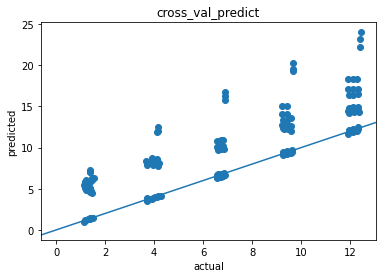

In [99]:
ldr_occ_mean_q_nn_results = fit_summarize_mm('ldr_occ_mean_q_nn', X_ldr_q, y_ldr_occ_mean, flavor='nn')



In [100]:
ldr_occ_mean_q_nn_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-3.434182,-3.538721,-0.590843,-0.797799,-0.214039,0.135455
1,-0.107489,-0.094677,-0.036071,-0.017494,0.998694,0.998951
2,-0.360259,-0.352437,-0.077102,-0.094351,0.988431,0.987407
3,-2.274486,-1.954145,-0.437928,-0.427439,0.395775,0.672986
4,-1.776412,-1.779773,-0.457458,-0.405935,0.746384,0.698041


What if we don't use queueing?

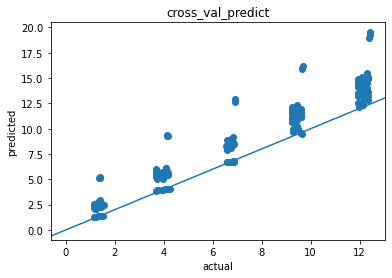

In [101]:
ldr_occ_mean_noq_nn_results = fit_summarize_mm('ldr_occ_mean_noq_nn', X_ldr_noq, y_ldr_occ_mean, flavor='nn')



In [43]:
ldr_occ_mean_noq_nn_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-1.608771,-2.257346,-0.295828,-0.559037,0.722525,0.528851
1,-2.127698,-2.206095,-0.800303,-0.489015,0.655481,0.520209
2,-2.145365,-2.003583,-0.426140,-0.495820,0.610307,0.643382
3,-0.051229,-0.063885,-0.011688,-0.022027,0.999662,0.999581
4,-0.063804,-0.080470,-0.015466,-0.018568,0.999640,0.999394


## 95th percentile of PP occ

,intercept,load_pp,sqrt_load_pp
0,-0.880013,0.966937,2.074920
1,-1.361466,0.956524,2.216845
2,-1.017094,0.966165,2.099247
3,-1.253662,0.954925,2.212727
4,-0.907811,0.968987,2.064107


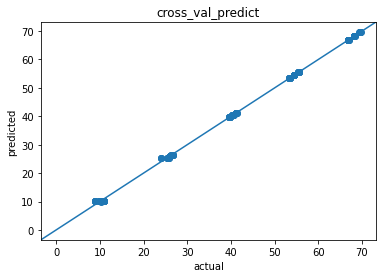

In [102]:
pp_occ_p95_load_results = fit_summarize_mm('pp_occ_p95_load', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_load_results['coeffs_df']


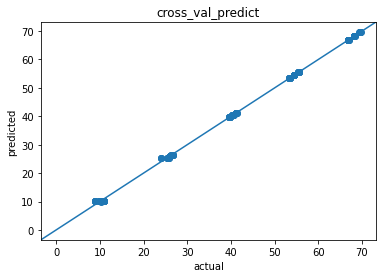

In [103]:
pp_occ_p95_load_results['plot']

Let's not fit an intercept.

,intercept,load_pp,sqrt_load_pp
0,0.0,1.004188,1.690525
1,0.0,1.008849,1.658409
2,0.0,1.008632,1.660579
3,0.0,1.006186,1.677064
4,0.0,1.005910,1.678994


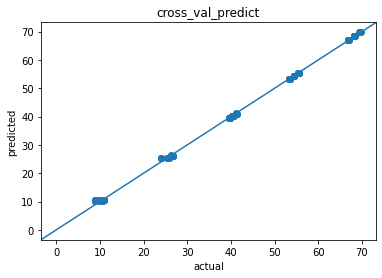

In [104]:
pp_occ_p95_load_results = fit_summarize_mm('pp_occ_p95_load', X_pp_q.loc[:, ['load_pp', 'sqrt_load_pp']], y_pp_occ_p95, 
                                               scale=False, fit_intercept=False, flavor='lm')
pp_occ_p95_load_results['coeffs_df']


We get quite close to the square root law based percentile approximation -> Load + 1.645 * sqrt(load)

In [105]:
pp_occ_p95_load_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.324401,-0.207688,-0.016931,-0.014059,0.999124,0.999738
1,-0.253565,-0.244493,-0.018960,-0.013968,0.999719,0.999619
2,-0.197752,-0.257302,-0.011039,-0.015904,0.999771,0.999617
3,-0.178188,-0.251977,-0.010033,-0.015930,0.999710,0.999643
4,-0.243595,-0.234510,-0.017214,-0.014112,0.999696,0.999640


Let's try the noq predictors

,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp
0,-17.929981,2.600497,8.584891,0.000000e+00,0.0,8.584891,0.013285
1,-18.909103,2.600069,9.071028,0.000000e+00,0.0,9.071028,0.010312
2,-16.126002,2.615814,7.861726,1.776357e-15,0.0,7.861726,0.010083
3,-18.267169,2.602676,8.753125,0.000000e+00,0.0,8.753125,0.012099
4,-15.618235,2.598550,7.704304,0.000000e+00,0.0,7.704304,0.013616


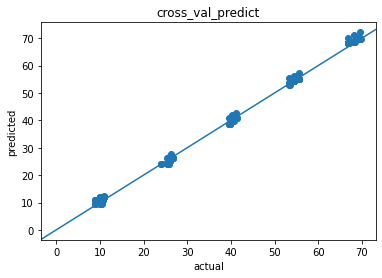

In [106]:
pp_occ_p95_noq_results = fit_summarize_mm('pp_occ_p95_load', X_pp_noq, y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_noq_results['coeffs_df']


In [107]:
pp_occ_p95_noq_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.570605,-0.562652,-0.021272,-0.027017,0.998456,0.998928
1,-0.678973,-0.505839,-0.043127,-0.023378,0.998497,0.998911
2,-0.508166,-0.573702,-0.018154,-0.026958,0.998956,0.998818
3,-0.485083,-0.566609,-0.021852,-0.027159,0.998794,0.998887
4,-0.612088,-0.539780,-0.031331,-0.024822,0.998876,0.998860


,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,-2.718286,0.308862,1.414625,-9.992007e-16,8.881784e-16,1.414625,-0.043598,0.865457,-4.256061,2.449904
1,-3.786685,0.476476,1.977872,-4.662937e-15,1.332268e-15,1.977872,-0.053510,0.797448,-5.338437,2.564618
2,-5.681173,0.663177,2.583597,-3.552714e-15,1.598721e-14,2.583597,-0.049536,0.705288,-4.718513,2.580245
3,-4.962369,0.520752,2.255485,4.218847e-15,-8.881784e-16,2.255485,-0.048150,0.762257,-4.652580,2.618613
4,-3.445779,0.452089,1.792098,-3.730349e-14,1.554312e-15,1.792098,-0.050000,0.806130,-4.867401,2.513655


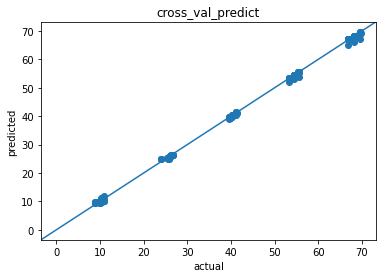

In [108]:
pp_occ_p95_q_results = fit_summarize_mm('pp_occ_p95_q', X_pp_q, y_pp_occ_p95, 
                                               scale=False, flavor='lm')
pp_occ_p95_q_results['coeffs_df']


,intercept,lam_obs,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_pp,rho_pp,sqrt_load_pp
0,39.351130,1.080601,6.378183,0.0,0.0,3.870971e-12,0.003338,0.481590,-0.077985,2.057954
1,41.646126,1.082644,6.880543,0.0,0.0,2.190350e-15,0.003950,0.477605,-0.000000,2.096355
2,38.601037,1.186822,7.528458,0.0,0.0,1.351392e-12,0.000708,0.434344,-0.382806,2.118351
3,39.841685,1.236045,8.431910,0.0,0.0,3.552739e-12,0.000000,0.406956,-0.681086,2.197661
4,39.729578,1.144819,6.775674,0.0,0.0,1.029465e-12,0.006411,0.454521,-0.000000,2.004905


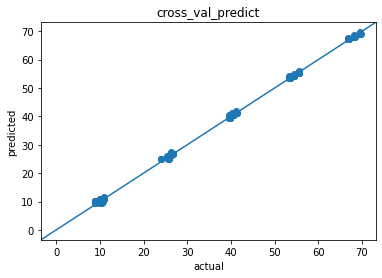

In [114]:
pp_occ_p95_q_lassocv_results = fit_summarize_mm('pp_occ_p95_q', X_pp_q, y_pp_occ_p95, 
                                               scale=True, flavor='lassocv', lasso_max_iter=2000)
pp_occ_p95_q_lassocv_results['coeffs_df']


In [117]:
pp_occ_p95_q_lassocv_results['alphas']

[0.045672144627938026,
 0.06041471722295108,
 0.05030770765656241,
 0.036559042644991074,
 0.04957568301911423]

## Mean occ for LDR

,intercept,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
0,-0.400388,4.538486e+05,0.004463,0.004247,0.039009,0.097659,0.003733,-0.000387,0.098832,-0.009607,-9.076963e+05,1.931428,0.040709,-1.175890,0.731879,0.060125,-2.867870,-0.017881,1.079055,-0.484831
1,-0.606603,2.871542e+05,0.002301,0.006914,0.031819,0.254403,-0.003017,0.000178,0.249430,-0.007197,-5.743078e+05,1.635102,0.076760,-0.845046,0.979934,0.047742,-2.796900,-0.024887,2.614893,-1.239315
2,-0.734057,7.047396e+05,-0.000164,-0.003164,0.029418,0.404745,-0.008370,0.001635,0.431209,-0.007548,-1.409479e+06,1.481425,0.104153,-0.833790,1.161461,0.043609,-2.746027,-0.045652,3.884725,-1.811860
3,-0.163175,4.642381e+05,0.004360,0.000615,0.030321,0.242289,-0.000333,0.000795,0.245230,-0.006806,-9.284755e+05,1.655324,0.061268,-0.836475,1.588888,0.030730,-2.908922,-0.049628,2.123350,-1.037829
4,0.392119,1.083633e+06,-0.003259,-0.000111,0.028167,0.024979,0.003911,0.001311,0.033886,-0.007248,-2.167266e+06,1.518590,0.049617,-0.867128,1.181086,0.044095,-2.886582,-0.059888,1.287309,-0.593650


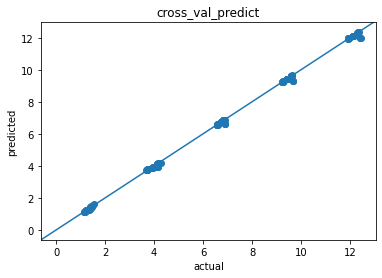

In [118]:
ldr_occ_mean_q_results = fit_summarize_mm('ldr_occ_mean_q', X_ldr_q, y_ldr_occ_mean, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_mean_q_results['coeffs_df']


In [119]:
ldr_occ_mean_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.028920,-0.021263,-0.007399,-0.007108,0.999846,0.999955
1,-0.035319,-0.020098,-0.017263,-0.005925,0.999887,0.999952
2,-0.023460,-0.022559,-0.007390,-0.007980,0.999949,0.999942
3,-0.022340,-0.022877,-0.007482,-0.007885,0.999926,0.999947
4,-0.023132,-0.022898,-0.007709,-0.007709,0.999950,0.999941


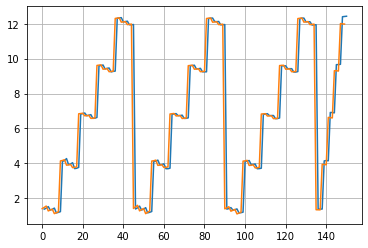

In [133]:
plt.plot(y_ldr_occ_mean)
plt.plot(ldr_occ_mean_q_results['predictions'])
plt.grid(True)

## 95th percentile occ for LDR

,intercept,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
0,9.715062,-2.913651e+06,-0.028653,-0.027264,0.218797,-0.807101,-0.023968,0.002482,-0.814636,-0.035185,5.827303e+06,14.832848,-0.086098,-5.652642,9.335673,0.196586,-26.264489,-0.651338,-6.648969,3.069022
1,10.245583,-3.194028e+06,-0.025594,-0.076907,0.240047,-1.372696,0.033558,-0.001979,-1.317380,-0.046268,6.388057e+06,15.399954,-0.132810,-6.741269,9.807757,0.188553,-25.910855,-0.537353,-10.294158,4.713539
2,7.876783,-6.484214e+06,0.001507,0.029116,0.235896,-0.656510,0.077010,-0.015043,-0.900000,-0.038253,1.296843e+07,15.371288,-0.048341,-6.096698,8.712692,0.218149,-25.823459,-0.551070,-5.887054,2.699131
3,6.463255,-6.405454e+06,-0.060159,-0.008486,0.249421,-0.045457,0.004601,-0.010975,-0.086033,-0.038529,1.281091e+07,16.015336,0.114415,-5.909540,8.959903,0.202242,-26.299237,-0.540523,0.456684,-0.463893
4,10.089863,-5.533702e+06,0.016641,0.000565,0.236223,-1.248256,-0.019971,-0.006697,-1.293739,-0.039808,1.106741e+07,15.089262,-0.076913,-5.918742,8.290541,0.215917,-25.887253,-0.593609,-7.854382,3.618001


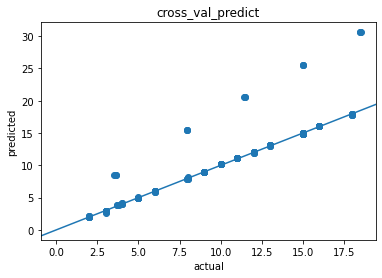

In [121]:
ldr_occ_p95_q_results = fit_summarize_mm('ldr_occ_p95_q', X_ldr_q, y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_q_results['coeffs_df']


In [122]:
ldr_occ_p95_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.081096,-0.092203,-0.010614,-0.013431,0.999342,0.999552
1,-0.110225,-0.087854,-0.020892,-0.011439,0.999223,0.999536
2,-0.102458,-0.084158,-0.011091,-0.012407,0.999420,0.999544
3,-0.106518,-0.083824,-0.014492,-0.011599,0.999191,0.999586
4,-0.100564,-0.084636,-0.015803,-0.011550,0.999479,0.999536


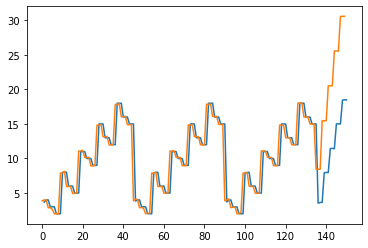

In [123]:
plt.plot(y_ldr_occ_p95)
plt.plot(ldr_occ_p95_q_results['predictions'])

Hmm, what's going on with the infinite capacity predictions?

,intercept,load_ldr,sqrt_load_ldr,rho_ldr,cap_ldr,rho_pp,cap_pp
0,0.0,0.907508,2.424858,-7.198099,0.070305,4.224283,-0.026360
1,0.0,0.877670,2.602274,-8.147227,0.043987,4.617170,-0.018873
2,0.0,0.864630,2.642908,-7.621132,0.052496,4.071580,-0.021382
3,0.0,0.875904,2.643974,-6.921562,0.093708,3.523485,-0.032921
4,0.0,0.956755,2.413378,-6.807141,0.122955,3.773945,-0.045129


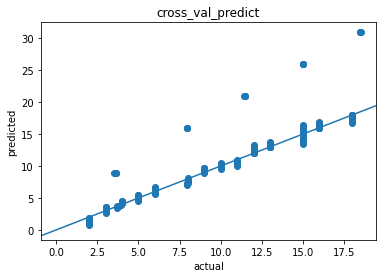

In [124]:
ldr_occ_p95_load_results = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr', 'rho_ldr', 'cap_ldr', 'rho_pp', 'cap_pp']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=False, flavor='lm')
ldr_occ_p95_load_results['coeffs_df']


,intercept,load_ldr,sqrt_load_ldr
0,0.0,0.945297,1.429390
1,0.0,1.004572,1.219254
2,0.0,0.941185,1.385620
3,0.0,0.955442,1.370911
4,0.0,0.966594,1.321633


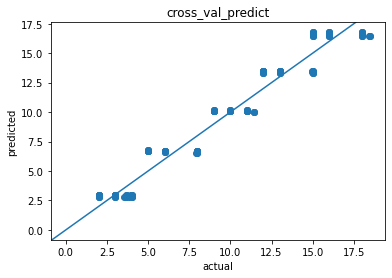

In [125]:
ldr_occ_p95_load_results2 = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=False, flavor='lm')
ldr_occ_p95_load_results2['coeffs_df']


We likely need to take into account the effective LDR LOS due to blocking patients in obs as well as the impact on LOS due to being blocked by PP. Both of these are baked into `ldr_effmean_svctime_approx`.

,intercept,load_ldr,sqrt_load_ldr,ldr_effmean_svctime_approx
0,-12.199190,0.960728,1.134553,1.117135
1,-13.996238,1.032352,0.796264,1.297753
2,-12.928222,0.923489,1.329682,1.148500
3,-11.911915,0.943919,1.244987,1.072177
4,-12.348572,1.007551,0.904832,1.145039


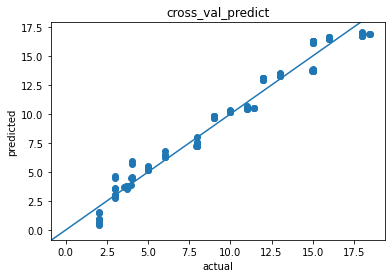

In [139]:
ldr_occ_p95_load_results3 = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr', 'ldr_effmean_svctime_approx']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_load_results3['coeffs_df']


,intercept,load_ldr,sqrt_load_ldr,ldr_effmean_svctime_approx
0,-12.199190,0.960728,1.134553,1.117135
1,-13.996238,1.032352,0.796264,1.297753
2,-12.928222,0.923489,1.329682,1.148500
3,-11.911915,0.943919,1.244987,1.072177
4,-12.348572,1.007551,0.904832,1.145039


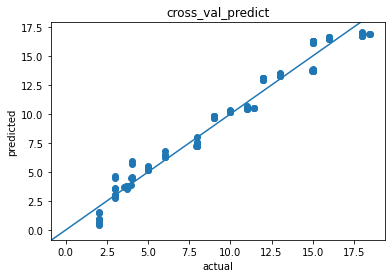

In [139]:
ldr_occ_p95_load_results4 = fit_summarize_mm('ldr_occ_p95_load', 
                                            X_ldr_q.loc[:, ['load_ldr', 'sqrt_load_ldr', 'ldr_effmean_svctime_approx']], y_ldr_occ_p95, 
                                               scale=False, fit_intercept=True, flavor='lm')
ldr_occ_p95_load_results4['coeffs_df']


Yes, that helps quite a bit.

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
0,0.359483,-6.409489e+17,0.0,0.113584,-0.0,0.0,0.0,-0.0,0.0,0.001555,0.0,0.002705,0.0,-0.0,-0.0,-0.0,0.0,0.527869,0.009718
1,0.397341,-6.740989e+17,0.0,0.121143,0.0,0.0,0.0,0.0,0.0,0.000304,-0.0,0.000000,0.0,-0.0,-0.0,-0.0,0.0,0.154708,0.000000
2,0.401850,-6.212507e+17,0.0,0.127779,-0.0,0.0,0.0,-0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,-0.0,-0.0,0.0,0.000000,0.000000
3,0.369732,-6.447742e+17,0.0,0.140409,0.0,0.0,0.0,0.0,0.0,0.000197,0.0,0.000000,0.0,-0.0,-0.0,-0.0,0.0,0.323822,0.000000
4,0.399351,-6.408420e+17,0.0,0.138107,-0.0,0.0,0.0,-0.0,0.0,0.000000,0.0,0.000000,0.0,-0.0,-0.0,-0.0,0.0,0.000000,0.000000


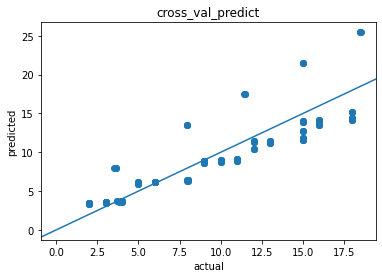

In [111]:
ldr_occ_p95_q_lasso_results = fit_summarize_mm('ldr_occ_p95_q', X_ldr_q, y_ldr_occ_p95, 
                                               scale=True, fit_intercept=False, lasso_alpha=1.0, flavor='lasso')
ldr_occ_p95_q_lasso_results['coeffs_df']


In [64]:
ldr_occ_p95_q_lasso_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-1.241354,-1.348909,-0.122596,-0.158986,0.851225,0.893895
1,-1.189150,-1.360512,-0.182560,-0.151503,0.911224,0.880084
2,-1.823821,-1.341882,-0.198376,-0.153762,0.828743,0.880896
3,-1.142440,-1.365689,-0.125762,-0.159129,0.898661,0.888365
4,-1.391324,-1.370595,-0.158089,-0.159221,0.898725,0.877392


Let's use LassoCV to see what optimal alphas look like.

,intercept,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
0,6.646427,0.485229,0.0,0.0,0.008028,-0.0,0.0,0.0,-0.0,0.0,0.000000,-0.0,0.0,0.055639,0.0,0.0,-0.713369,0.010165,0.0,0.0
1,7.066027,0.483881,0.0,0.0,0.006704,-0.0,0.0,0.0,-0.0,0.0,0.002467,-0.0,0.0,0.078107,0.0,0.0,-0.813566,0.025049,0.0,0.0
2,6.497215,0.482069,0.0,0.0,0.009907,-0.0,0.0,0.0,-0.0,0.0,0.000000,-0.0,0.0,0.000000,0.0,-0.0,-0.511184,0.038673,0.0,0.0
3,6.729732,0.476634,0.0,0.0,0.014830,-0.0,0.0,0.0,-0.0,0.0,0.000000,-0.0,0.0,0.000000,-0.0,-0.0,-0.271948,0.026938,0.0,0.0
4,6.697665,0.481863,0.0,0.0,0.009182,-0.0,0.0,0.0,-0.0,0.0,0.000000,-0.0,0.0,0.000000,0.0,-0.0,-0.618878,0.016954,0.0,0.0


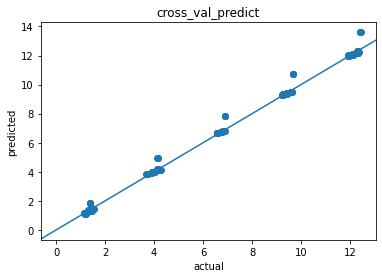

In [126]:
ldr_occ_mean_q_lassocv_results = fit_summarize_mm('ldr_occ_mean_q', X_ldr_q, y_ldr_occ_mean, 
                                                 scale=True, fit_intercept=True, 
                                                 flavor='lassocv', lasso_max_iter=2000)
ldr_occ_mean_q_lassocv_results['coeffs_df']


In [127]:
ldr_occ_mean_q_lassocv_results['alphas']

[0.024422709836967933,
 0.02450317932312632,
 0.0353398634808102,
 0.06382265706486771,
 0.04621140781712059]

,intercept,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
0,9.894953,0.452175,0.0,0.0,0.059307,-0.0,0.0,0.0,-0.0,0.0,0.001387,0.0,0.002449,0.0,-0.0,-0.0,-5.497747,0.0,0.755659,0.010031
1,10.355002,0.496995,0.0,0.0,0.044371,-0.0,0.0,0.0,-0.0,0.0,0.028536,0.0,0.000000,0.0,-0.0,-0.0,-6.799668,0.0,0.317116,0.000000
2,9.621585,0.428044,0.0,0.0,0.091741,-0.0,0.0,0.0,-0.0,0.0,0.001986,0.0,0.004617,0.0,-0.0,-0.0,-4.036934,0.0,0.505344,0.037113
3,9.948040,0.389848,0.0,0.0,0.136253,0.0,0.0,0.0,0.0,0.0,0.000292,0.0,0.000000,0.0,-0.0,-0.0,-1.489410,0.0,0.553683,0.000000
4,9.893470,0.451733,0.0,0.0,0.103932,-0.0,0.0,0.0,-0.0,0.0,0.000903,0.0,0.000000,0.0,-0.0,-0.0,-3.366734,0.0,0.274035,0.000000


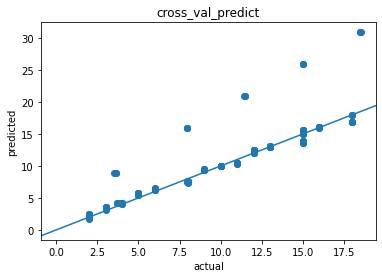

In [128]:
ldr_occ_p95_q_lassocv_results = fit_summarize_mm('ldr_occ_p95_q_lassocv', X_ldr_q, y_ldr_occ_p95, 
                                                 scale=True, fit_intercept=True, 
                                                 flavor='lassocv', lasso_max_iter=2000)
ldr_occ_p95_q_lassocv_results['coeffs_df']


In [73]:
ldr_occ_p95_q_lassocv_results['alphas']

[0.2675035298753466,
 0.25113741855068916,
 0.3825802030739024,
 0.6485210461874586,
 0.5031101007960207]

Great fit on mean but not so easy to interpret model. We should be able to estimate mean occupancy as lam * eff_svc_time.

In [152]:
ldr_occ_mean_direct_approx = X_ldr_q['lam_obs'] * X_ldr_q['ldr_effmean_svctime_approx'] /24.0 

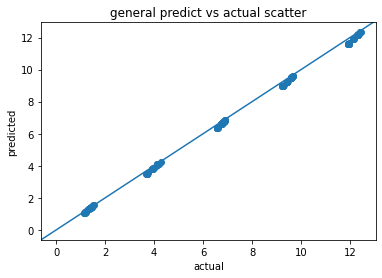

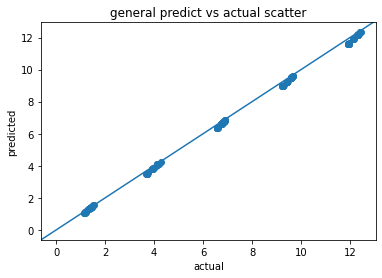

In [153]:
prediction_scatter(y_ldr_occ_mean, ldr_occ_mean_direct_approx)

In [154]:
ldr_occ_p95_direct_approx = ldr_occ_mean_direct_approx + 1.645 * np.sqrt(ldr_occ_mean_direct_approx)

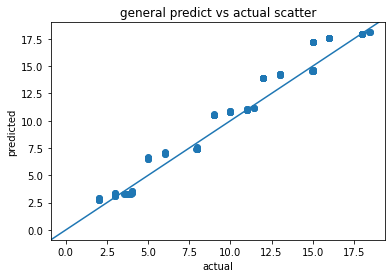

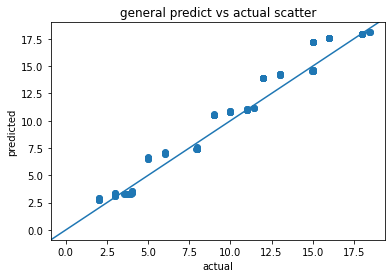

In [155]:
prediction_scatter(y_ldr_occ_p95, ldr_occ_p95_direct_approx)

For the over predictions, perhaps we are bumping up against capacity restrictions. A simple metametamodel that includes the direct approximation along with rho_ldr might do ok.

In [156]:
X_ldr_approx = pd.DataFrame({'ldr_occ_p95_direct_approx': ldr_occ_p95_direct_approx,
               'rho_ldr': X_ldr_q.loc[:, 'rho_ldr']})

In [157]:
X_ldr_approx

,ldr_occ_p95_direct_approx,rho_ldr
1,3.277706,0.342466
2,3.385381,0.342466
3,3.567897,0.342466
4,3.148923,0.456621
5,3.238028,0.456621
...,...,...
146,14.682971,0.368809
147,14.682971,0.368809
148,18.104743,0.397702
149,18.104743,0.397702


,intercept,ldr_occ_p95_direct_approx,rho_ldr
0,1.924021,1.016052,-4.346866
1,2.168805,1.020495,-4.809776
2,1.986961,1.016414,-4.506159
3,2.086755,1.019448,-4.626403
4,2.130991,1.020726,-4.733262


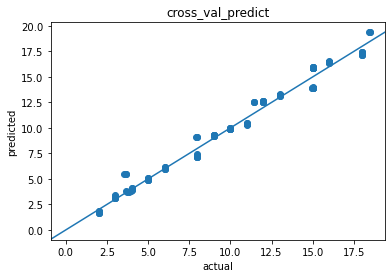

In [158]:
ldr_occ_p95_q_approx_results = fit_summarize_mm('ldr_occ_p95_q_approx', X_ldr_approx, y_ldr_occ_p95, 
                                                 scale=False, fit_intercept=True, 
                                                 flavor='lm')
ldr_occ_p95_q_approx_results['coeffs_df']


Not bad at all.

## Trying SVR for LDR occ p95

Just going to use default C and epsilon for now.

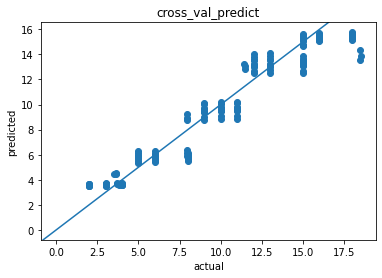

In [159]:
ldr_occ_p95_q_svr_results = fit_summarize_mm('ldr_occ_p95_q_svr', X_ldr_q, y_ldr_occ_p95, flavor='svr')



In [160]:
ldr_occ_p95_q_svr_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-1.093134,-0.893268,-0.114357,-0.123357,0.893837,0.948928
1,-0.892976,-0.931540,-0.165058,-0.111674,0.958368,0.936856
2,-1.209085,-0.911933,-0.165427,-0.130581,0.912893,0.941354
3,-0.926502,-0.965428,-0.116757,-0.142053,0.939014,0.942239
4,-0.877684,-1.002774,-0.139133,-0.142992,0.948336,0.931622


## Trying MLPRegressor (neural net) for LDR occ p95

Just going to use default values for all tuning parameters for now (except hard coded max_iter=2000)

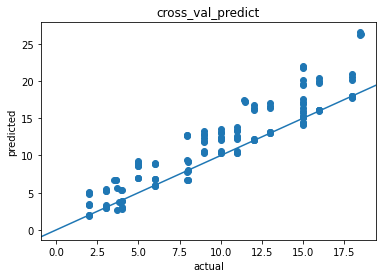

In [161]:
ldr_occ_p95_q_nn_results = fit_summarize_mm('ldr_occ_p95_q_nn', X_ldr_q, y_ldr_occ_p95, flavor='nn')



In [162]:
ldr_occ_p95_q_nn_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-2.170936,-2.056757,-0.275721,-0.327595,0.640707,0.808704
1,-3.321538,-3.636504,-0.601222,-0.490506,0.500824,0.352026
2,-2.522459,-2.564845,-0.325960,-0.355270,0.690910,0.657081
3,-1.293747,-1.259013,-0.137180,-0.149623,0.885794,0.905258
4,-0.139246,-0.092077,-0.018563,-0.012090,0.998480,0.999440


Neither SVR nor neural net performs well on occupancy predictions.

## Pct blocked in LDR

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp,intercept
0,12934.683808,0.000127,0.000121,0.000238,0.020635,0.000106,-0.000011,0.020669,-1.069753e-04,-25869.379315,0.009435,0.002469,-0.017563,0.940678,0.001079,-0.000474,0.000622,0.127664,-0.057178,-0.066462
1,2454.737295,0.000020,0.000059,-0.000266,0.056908,-0.000026,0.000002,0.056866,1.038546e-04,-4909.509584,-0.008989,0.007562,0.005157,0.928345,0.000839,-0.000920,-0.001758,0.388300,-0.180658,-0.129914
2,14930.709216,-0.000003,-0.000067,-0.000067,0.037963,-0.000177,0.000035,0.038524,-9.036822e-07,-29861.441693,-0.002215,0.004980,-0.006920,0.938177,0.000858,0.000305,-0.000779,0.255087,-0.117130,-0.092696
3,14510.251151,0.000136,0.000019,0.000029,0.033192,-0.000010,0.000025,0.033284,-3.194620e-05,-29020.522414,-0.000352,0.004277,-0.007230,0.935007,0.000868,0.001230,-0.000396,0.219914,-0.100474,-0.086341
4,15841.210708,-0.000048,-0.000002,-0.000344,0.032129,0.000057,0.000019,0.032259,3.927405e-05,-31682.441281,-0.012103,0.004168,-0.004137,0.940453,0.000886,0.000517,-0.001906,0.218651,-0.098559,-0.065739


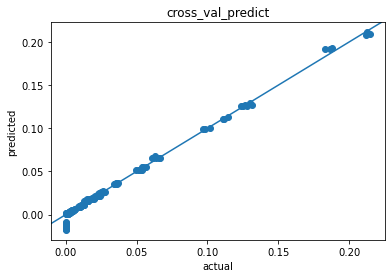

In [80]:
mean_pct_blocked_by_pp_q_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q, y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_q_results['coeffs_df']


In [81]:
mean_pct_blocked_by_pp_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.001033,-0.000630,-6.815339e-02,-1.084444e+11,0.998588,0.999463
1,-0.001390,-0.000604,-5.885361e+11,-1.295510e+11,0.998300,0.999562
2,-0.000398,-0.000812,-8.372649e+10,-1.840253e+11,0.999820,0.999272
3,-0.000691,-0.000728,-1.534012e+11,-1.489408e+11,0.999179,0.999381
4,-0.000729,-0.000728,-3.826115e+11,-1.443853e+11,0.999510,0.999294


**Yes**, adding in the erlang_c approximation leads to drastically better model. Leaving out just the erlang_c term while keeping in the other queueing related terms leads to not nearly as good of a fit. However, there are some crazy coefficients in this model on the other variables. Let's try Lasso. But, first, let's see the noq results.

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,0.005342,-3.903128e-18,-6.071532e-18,0.004197,0.000931,0.0,0.0,0.000931,-0.003610,0.076765
1,0.004932,-9.974660e-18,-9.540979e-18,0.004560,-0.014922,0.0,0.0,-0.014922,-0.003688,0.123995
2,0.006226,3.295975e-17,-3.469447e-18,0.004830,-0.015809,0.0,0.0,-0.015809,-0.004141,0.126307
3,0.005390,2.506675e-16,2.688821e-17,0.004548,-0.027769,0.0,0.0,-0.027769,-0.003809,0.155120
4,0.006678,1.040834e-17,-3.469447e-18,0.005373,-0.005284,0.0,0.0,-0.005284,-0.004343,0.094917


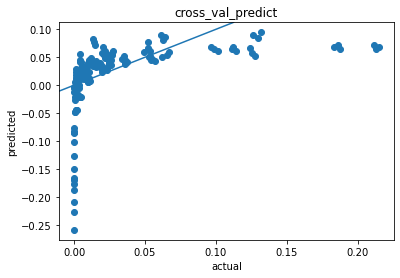

In [82]:
mean_pct_blocked_by_pp_noq_results = fit_summarize_mm('mean_pct_blocked_by_pp_noq', X_ldr_noq, y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_noq_results['coeffs_df']


In [83]:
mean_pct_blocked_by_pp_noq_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.022030,-0.023926,-3.011855e+00,-1.555750e+13,0.511335,0.419325
1,-0.027397,-0.023851,-1.954217e+13,-1.192508e+13,0.412560,0.453432
2,-0.023453,-0.025302,-1.438006e+13,-1.404140e+13,0.260776,0.469921
3,-0.022054,-0.025237,-1.776391e+13,-1.261181e+13,0.438368,0.446506
4,-0.028051,-0.023237,-1.875278e+13,-1.209608e+13,0.413471,0.456434


Let's now see if lasso can push a bunch of coefficients to zero to give us a more interpretable model.

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp
0,-0.0,-1.737722e+15,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.856149,0.0,0.0,-0.0,-0.0,-0.0
1,-0.0,-1.786714e+15,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.847385,0.0,0.0,-0.0,-0.0,-0.0
2,-0.0,-2.077131e+15,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.852702,0.0,0.0,0.0,-0.0,-0.0
3,-0.0,-1.974979e+15,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.853138,0.0,0.0,0.0,-0.0,-0.0
4,-0.0,-1.813945e+15,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.845194,0.0,0.0,-0.0,-0.0,-0.0


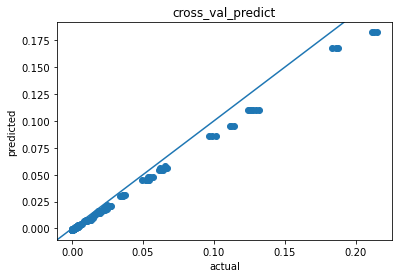

In [84]:
mean_pct_blocked_by_pp_q_lasso_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q, y_mean_pct_blocked_by_pp, 
                                               scale=True, fit_intercept=False, lasso_alpha=0.005, flavor='lasso')
mean_pct_blocked_by_pp_q_lasso_results['coeffs_df']


In [ ]:
mean_pct_blocked_by_pp_q_lasso_results['metrics_df']

Well, pct blocked by PP is much harder to predict. 

Lasso essentially pushes all coeffs to zero except the erlangc term (with coeffs ~0.85). We end up with a biased low model with relatively low variance.

Coefficients in linear models are all over the place.

What if we fit a model with just the erlang-c term (and maybe a few others)?


,prob_blockedby_pp_approx,intercept
0,0.959796,-0.000053
1,0.948940,0.000070
2,0.950844,0.000026
3,0.949794,0.000074
4,0.949787,0.000065


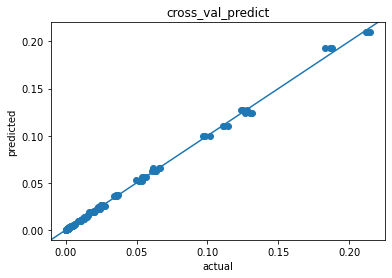

In [85]:
mean_pct_blocked_by_pp_erlangc_results = fit_summarize_mm('mean_pct_blocked_by_pp_q', X_ldr_q.loc[:, ['prob_blockedby_pp_approx']], y_mean_pct_blocked_by_pp, 
                                               scale=False, fit_intercept=True, flavor='lm')
mean_pct_blocked_by_pp_erlangc_results['coeffs_df']


Nice. Notice the difference in the coefficient on the erlang term in this model compared to the lasso model.

## Conditional mean time blocked in LDR
No sense in including the infinite capacity scenarios.

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,prob_blockedby_ldr_approx,ldr_effmean_svctime_approx,sqrt_load_ldr,sqrt_load_pp,intercept
0,-1.433852e+07,0.037314,-0.174830,-0.032659,2.201753,0.230922,0.038521,2.471769,-0.033803,2.867705e+07,11.123064,0.353642,6.267765,-6.701412,0.656278,-6.400263,1.028157,8.064886,-7.044051,-15.296009
1,-1.111877e+07,0.040495,-0.153709,-0.123410,6.703101,-0.023591,-0.011857,6.546889,-0.019552,2.223754e+07,10.112378,1.027704,7.262214,-7.272560,0.697836,-7.489751,0.903118,40.753037,-22.233553,-24.884985
2,-1.299848e+07,0.180227,-0.192226,-0.123936,3.757508,0.001150,-0.135595,3.904766,-0.042121,2.599696e+07,12.374691,0.528407,4.669113,-6.104841,0.746428,-9.486462,0.886986,18.021840,-11.387960,-16.935090
3,-1.506485e+07,-0.608355,0.129548,-0.150075,3.678309,0.063075,-0.008465,4.032310,-0.051177,3.012970e+07,14.569921,0.671051,4.115041,-6.077209,0.761731,-11.607897,0.934203,21.158883,-13.075435,-17.893423
4,-1.537165e+07,-0.068706,0.119685,-0.140697,4.874943,0.009464,-0.058718,5.161063,-0.032524,3.074330e+07,14.705506,0.853168,6.036320,-6.527372,0.696247,-10.977296,1.041088,28.750689,-17.103398,-21.695097


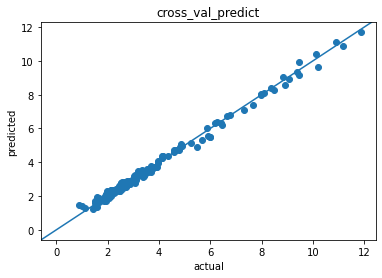

In [86]:
condmeantime_blockedbypp_q_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               scale=False, fit_intercept=True, flavor='lm')
condmeantime_blockedbypp_q_results['coeffs_df']


In [87]:
condmeantime_blockedbypp_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.151717,-0.113162,-0.039809,-0.038828,0.995204,0.996621
1,-0.149841,-0.116163,-0.043613,-0.039042,0.993830,0.996642
2,-0.122505,-0.123951,-0.037581,-0.041278,0.994019,0.996664
3,-0.141600,-0.117344,-0.046931,-0.039946,0.996010,0.996471
4,-0.134187,-0.122864,-0.059182,-0.038193,0.995272,0.996513


Now just use the queueing approximation.

,condmeantime_blockedbypp_approx,intercept
0,0.913138,0.297361
1,0.920816,0.293808
2,0.944187,0.212366
3,0.934695,0.255012
4,0.925821,0.290605


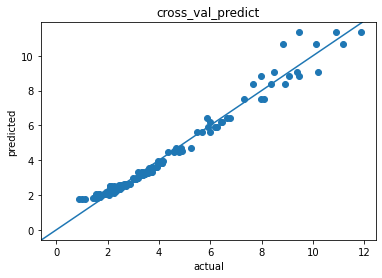

In [88]:
condmeantime_blockedbypp_qapprox_results = fit_summarize_mm('condmeantime_blockedbypp_qapprox', X_ldr_q.loc[:135, ['condmeantime_blockedbypp_approx']], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               scale=False, fit_intercept=True, flavor='lm')
condmeantime_blockedbypp_qapprox_results['coeffs_df']


In [89]:
condmeantime_blockedbypp_qapprox_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.243322,-0.266860,-0.054669,-0.089032,0.985054,0.974668
1,-0.248828,-0.255996,-0.084492,-0.080267,0.983038,0.976682
2,-0.240861,-0.249099,-0.063380,-0.080852,0.953146,0.981259
3,-0.304506,-0.233633,-0.087568,-0.076598,0.968288,0.980628
4,-0.238538,-0.253330,-0.112062,-0.072689,0.981672,0.977043


Not as good as with all the columns but not bad at all.

,lam_obs,alos_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,intercept
0,0.404233,3.849698e-14,1.339207e-14,-0.019695,1.881811,0.0,0.0,1.881811,-0.210402,3.226478
1,0.298616,1.390554e-14,-5.828671e-16,0.009594,1.517424,0.0,0.0,1.517424,-0.187922,4.378272
2,0.422098,4.662937e-15,-7.494005e-16,0.075329,3.759828,0.0,0.0,3.759828,-0.244112,-1.052906
3,0.419257,-3.252953e-14,1.085243e-14,0.088216,2.747337,0.0,0.0,2.747337,-0.241606,1.159640
4,0.417970,-2.450817e-14,5.329071e-15,0.089203,3.372908,0.0,0.0,3.372908,-0.245085,-0.175821


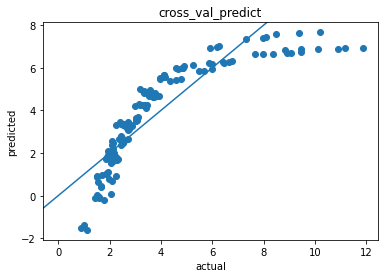

In [90]:
condmeantime_blockedbypp_noq_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               scale=False, fit_intercept=True, flavor='lm')
condmeantime_blockedbypp_noq_results['coeffs_df']


Let's see how ML techniques due with no queueing info.

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.439144,-0.236900,-0.093813,-0.065899,0.947782,0.968093
1,-0.402858,-0.244532,-0.096099,-0.069350,0.924016,0.978464
2,-0.245247,-0.245670,-0.075331,-0.069283,0.977385,0.978697
3,-0.331460,-0.237717,-0.105904,-0.064733,0.975385,0.976003
4,-0.302188,-0.248103,-0.107659,-0.066817,0.967126,0.975821


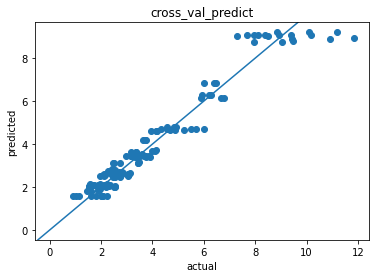

In [91]:
condmeantime_blockedbypp_noq_rf_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='rf')
condmeantime_blockedbypp_noq_rf_results['metrics_df']


,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.863682,-0.539336,-0.153264,-0.135034,0.746227,0.846508
1,-0.696107,-0.588775,-0.181813,-0.141026,0.789717,0.842213
2,-0.455584,-0.612653,-0.114214,-0.146527,0.888075,0.843435
3,-0.568615,-0.612489,-0.134018,-0.143961,0.871059,0.797676
4,-0.591661,-0.604784,-0.194140,-0.139769,0.851392,0.840164


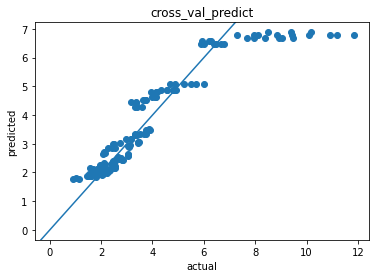

In [92]:
condmeantime_blockedbypp_noq_svr_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='svr')
condmeantime_blockedbypp_noq_svr_results['metrics_df']


,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.186576,-0.156228,-0.051714,-0.047742,0.993223,0.992604
1,-3.240362,-3.546395,-1.099148,-1.273068,-1.705723,-1.903104
2,-0.165742,-0.163530,-0.055023,-0.048657,0.987719,0.992801
3,-3.328561,-2.801792,-1.147691,-0.934061,-1.135915,-1.074159
4,-0.169683,-0.157990,-0.046487,-0.046299,0.989100,0.992438


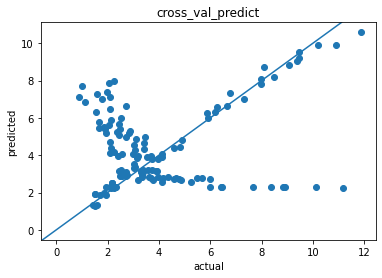

In [93]:
condmeantime_blockedbypp_noq_nn_results = fit_summarize_mm('condmeantime_blockedbypp_noq', X_ldr_noq.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='nn')
condmeantime_blockedbypp_noq_nn_results['metrics_df']


What if we add queueing info including the erlangc and cond mean wait approximations.

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.292905,-0.172745,-0.051036,-0.042243,0.964287,0.976432
1,-0.321781,-0.159772,-0.070012,-0.039196,0.941712,0.986714
2,-0.132513,-0.161462,-0.038336,-0.039446,0.991984,0.986044
3,-0.268409,-0.153688,-0.059524,-0.040443,0.976920,0.984311
4,-0.231108,-0.177678,-0.082588,-0.041015,0.971142,0.982665


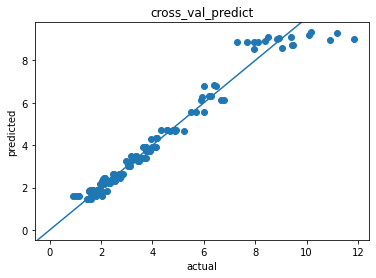

In [94]:
condmeantime_blockedbypp_q_rf_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='rf')
condmeantime_blockedbypp_q_rf_results['metrics_df']


,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.829961,-0.520098,-0.143055,-0.128270,0.757600,0.853786
1,-0.673307,-0.566746,-0.173090,-0.132036,0.796953,0.846175
2,-0.429807,-0.585400,-0.105175,-0.137135,0.896015,0.851349
3,-0.542073,-0.584729,-0.122005,-0.134299,0.879097,0.810072
4,-0.548796,-0.578653,-0.175989,-0.129742,0.862722,0.847315


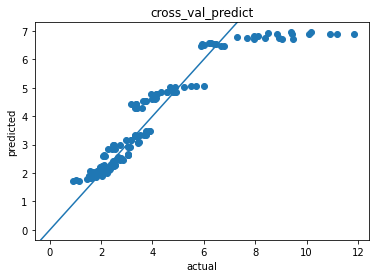

In [95]:
condmeantime_blockedbypp_q_svr_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='svr')
condmeantime_blockedbypp_q_svr_results['metrics_df']


,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-3.510065,-3.187722,-1.144067,-1.334727,-0.733967,-1.335479
1,-0.131703,-0.109794,-0.045851,-0.037331,0.995134,0.996581
2,-1.599374,-1.906599,-0.584755,-0.667783,0.093753,0.253487
3,-0.159685,-0.144634,-0.045923,-0.042620,0.994101,0.993069
4,-0.142867,-0.117335,-0.054185,-0.034567,0.995032,0.995539


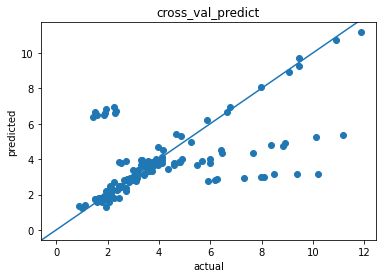

In [98]:
condmeantime_blockedbypp_q_nn_results = fit_summarize_mm('condmeantime_blockedbypp_q', X_ldr_q.iloc[:135], y_condmeantime_blockedbypp_sim.iloc[:135], 
                                               flavor='nn')
condmeantime_blockedbypp_q_nn_results['metrics_df']


There's a large amount of variability in the NN when code cell is repeatedly run. Yikes.

## Occupancy for OBS

,lam_obs,alos_obs,cap_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,...,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,sqrt_load_obs,sqrt_load_ldr,sqrt_load_pp,intercept
0,-4.565563e+06,-1.862264,-0.337747,2.641134,-0.002860,2.252140,-0.329204,0.803000,-2.399999,0.001439,...,7.366700e+06,-0.084861,-0.005817,0.123804,0.943615,-0.012892,5.155330e+06,-2.305532e+06,0.155839,-6.556071
1,4.930252e+04,-7.792201,-0.195503,-4.869562,0.000450,0.028638,-1.571314,-0.092928,-0.464688,0.000104,...,3.477824e+06,0.048800,-0.024634,-0.090043,0.529949,0.009298,-1.125404e+07,5.032961e+06,0.615834,7.291950
2,-1.132197e+07,2.331105,-0.532717,-8.026071,0.008174,-5.118117,-4.209571,2.634225,4.456877,0.000540,...,1.372102e+07,0.623494,-0.061505,-0.120552,1.081246,-0.006156,2.709935e+07,-1.211920e+07,1.239801,15.719811
3,-1.587382e+05,-2.140913,-0.269334,-0.961538,0.001938,-6.473735,0.552366,-0.443935,6.515829,-0.001090,...,3.967334e+06,0.072933,0.012563,-0.261598,0.104253,0.031945,-1.150338e+07,5.144468e+06,-0.163453,14.351839
4,1.661418e+06,-1.584266,-0.219673,4.779235,0.001838,-5.373287,2.022537,0.296803,5.800055,0.000721,...,3.597976e+06,0.196280,0.029785,-0.092278,0.211235,0.025080,-2.164106e+07,9.678179e+06,-0.725505,4.067515


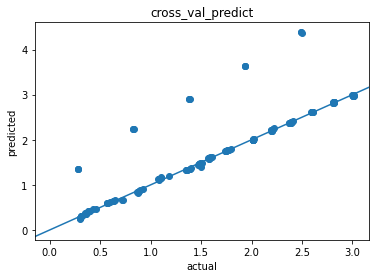

In [69]:
obs_occ_mean_q_results = fit_summarize_mm('obs_occ_mean_q', X_obs_q, y_obs_occ_mean, 
                                               scale=False, fit_intercept=True, flavor='lm')
obs_occ_mean_q_results['coeffs_df']


Look at volatility of the coefficients.

In [72]:
obs_occ_mean_q_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.019809,-0.020120,-0.016869,-0.021333,0.998665,0.999200
1,-0.020422,-0.020041,-0.034357,-0.019111,0.999246,0.999058
2,-0.023891,-0.019195,-0.023492,-0.018669,0.998646,0.999221
3,-0.022707,-0.018459,-0.021396,-0.018916,0.998478,0.999289
4,-0.026963,-0.017474,-0.029945,-0.017240,0.998741,0.999255


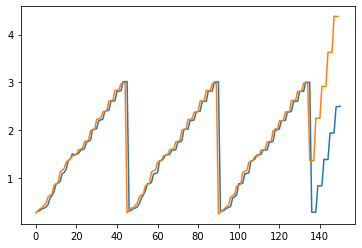

In [71]:
plt.plot(y_obs_occ_mean)
plt.plot(obs_occ_mean_q_results['predictions'])

,lam_obs,alos_obs,cap_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp,...,condmeantime_blockedbyldr_approx,load_ldr,rho_ldr,load_pp,rho_pp,prob_blockedby_pp_approx,condmeantime_blockedbypp_approx,sqrt_load_obs,sqrt_load_ldr,sqrt_load_pp
0,0.102121,0.0,0.0,0.0,-0.000810,-0.063591,0.0,0.0,-2.388025e-15,0.0,...,-0.090466,0.0,-0.000000,0.0,-0.098391,0.108512,0.020081,-0.0,-0.0,-0.0
1,0.102245,0.0,0.0,0.0,-0.000607,-0.041085,0.0,0.0,-0.000000e+00,0.0,...,-0.075615,0.0,-0.046756,0.0,-0.077164,0.349886,0.005882,-0.0,-0.0,-0.0
2,0.102443,0.0,0.0,0.0,-0.001129,-0.055792,0.0,0.0,-1.307720e-16,0.0,...,-0.096485,0.0,-0.000000,0.0,-0.145734,0.000748,0.024736,-0.0,-0.0,-0.0
3,0.102263,0.0,0.0,0.0,-0.000585,0.000000,0.0,0.0,0.000000e+00,0.0,...,-0.100714,0.0,-0.000000,0.0,-0.120473,0.000000,0.026415,-0.0,-0.0,-0.0
4,0.101916,0.0,0.0,0.0,-0.000271,0.000000,0.0,0.0,0.000000e+00,0.0,...,-0.104789,0.0,-0.000000,0.0,-0.117709,0.000000,0.027557,-0.0,-0.0,-0.0


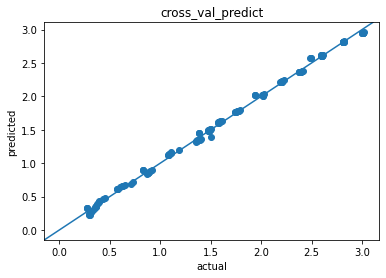

In [75]:
obs_occ_mean_q_results_lassocv = fit_summarize_mm('obs_occ_mean_q', X_obs_q, y_obs_occ_mean, 
                                               scale=True, lasso_max_iter=2000, flavor='lassocv')
obs_occ_mean_q_results_lassocv['coeffs_df']


In [76]:
dict(obs_occ_mean_q_results_lassocv['coeffs_df'])

{'lam_obs': 0    0.102121
 1    0.102245
 2    0.102443
 3    0.102263
 4    0.101916
 Name: lam_obs, dtype: float64,
 'alos_obs': 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: alos_obs, dtype: float64,
 'cap_obs': 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: cap_obs, dtype: float64,
 'alos_ldr': 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: alos_ldr, dtype: float64,
 'cap_ldr': 0   -0.000810
 1   -0.000607
 2   -0.001129
 3   -0.000585
 4   -0.000271
 Name: cap_ldr, dtype: float64,
 'alos_pp': 0   -0.063591
 1   -0.041085
 2   -0.055792
 3    0.000000
 4    0.000000
 Name: alos_pp, dtype: float64,
 'alos_pp_noc': 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: alos_pp_noc, dtype: float64,
 'alos_pp_c': 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: alos_pp_c, dtype: float64,
 'tot_c_rate': 0   -2.388025e-15
 1   -0.000000e+00
 2   -1.307720e-16
 3    0.000000e+00
 4    0.000000e+00
 Name: tot_c_rate, dtype: float64,
 'cap_pp': 0    0.0
 

Great fit but not so easy to interpret model. Since OBS is an infinite capacity system, we should be able to estimate mean occupancy as load + mean number q'd for LDR.

In [88]:
obs_occ_mean_direct_approx = X_obs_q['load_obs'] + \
    X_obs_q['lam_obs'] * X_obs_q['prob_blockedby_ldr_approx'] * X_obs_q['condmeantime_blockedbyldr_approx'] / 24.0

In [89]:
obs_occ_mean_direct_approx

1      0.297709
2      0.303123
3      0.314644
4      0.372783
5      0.389785
         ...   
146    1.917813
147    1.917813
148    2.465757
149    2.465757
150    2.465757
Length: 150, dtype: float64

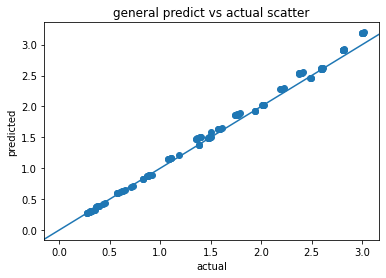

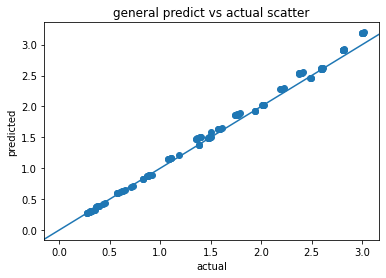

In [90]:
prediction_scatter(y_obs_occ_mean, obs_occ_mean_direct_approx)

'condmeantime_blockedbyldr_approx',
 'condmeantime_blockedbyldr_sim',
 'condmeantime_blockedbypp_approx',
 'condmeantime_blockedbypp_sim',
 'ldr_effmean_svctime_approx',
 'ldr_effmean_svctime_sim',
 'prob_blockedby_ldr_approx',
 'prob_blockedby_ldr_sim',
 'prob_blockedby_pp_approx',
 'prob_blockedby_pp_sim']

,lam_obs,alos_obs,cap_obs,alos_ldr,cap_ldr,alos_pp,alos_pp_noc,alos_pp_c,tot_c_rate,cap_pp
0,0.117612,0.0,0.001979,0.0,-0.021268,-0.0,0.0,0.0,-0.0,0.0
1,0.116280,0.0,0.000000,0.0,-0.021085,-0.0,0.0,0.0,-0.0,0.0
2,0.119272,0.0,0.001105,0.0,-0.022687,-0.0,0.0,0.0,-0.0,0.0
3,0.117695,0.0,0.000000,0.0,-0.021592,-0.0,0.0,0.0,-0.0,0.0
4,0.116245,0.0,0.009885,0.0,-0.024126,-0.0,0.0,0.0,-0.0,0.0


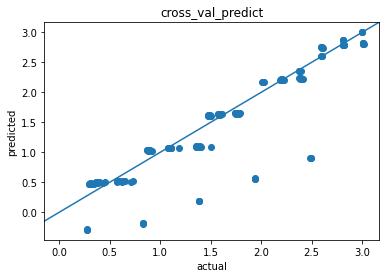

In [77]:
obs_occ_mean_noq_results_lassocv = fit_summarize_mm('obs_occ_mean_noq', X_obs_noq, y_obs_occ_mean, 
                                               scale=True, lasso_max_iter=2000, flavor='lassocv')
obs_occ_mean_noq_results_lassocv['coeffs_df']


## SVR and NN on pct blocked in LDR

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.069030,-0.075850,-1.837437e+01,-5.268429e+13,-1.076729,-1.963655
1,-0.071938,-0.075336,-4.430425e+13,-4.174377e+13,-1.493507,-1.836854
2,-0.082987,-0.072916,-4.149706e+13,-4.265423e+13,-3.400803,-1.541658
3,-0.074061,-0.074730,-6.823922e+13,-3.570248e+13,-3.130927,-1.551927
4,-0.076207,-0.075322,-5.785347e+13,-3.888802e+13,-1.236758,-2.027019


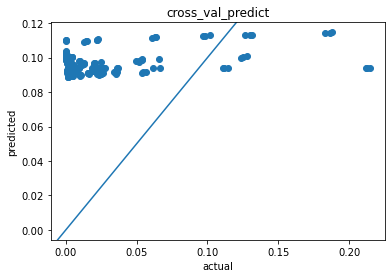

In [78]:
mean_pct_blocked_by_pp_q_svr_results = fit_summarize_mm('mean_pct_blocked_by_pp_q_rf', X_ldr_q, y_mean_pct_blocked_by_pp, flavor='svr')

mean_pct_blocked_by_pp_q_svr_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.364064,-0.344029,-9.870040e+01,-2.266042e+14,-67.600599,-76.894867
1,-1.450957,-1.754270,-8.859093e+14,-1.566537e+15,-1141.056628,-1756.944294
2,-0.074421,-0.069921,-6.545897e+13,-6.162361e+13,-5.070802,-2.283506
3,-3.346407,-3.212867,-3.674261e+15,-1.708936e+15,-8651.450692,-4946.329084
4,-2.393600,-2.317551,-1.678351e+15,-1.095837e+15,-2077.185447,-2729.281255


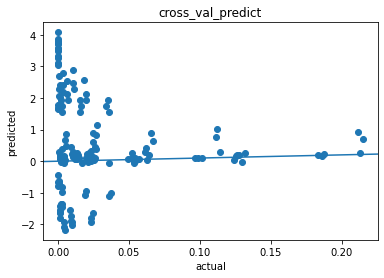

In [79]:
mean_pct_blocked_by_pp_q_nn_results = fit_summarize_mm('mean_pct_blocked_by_pp_q_rf', X_ldr_q, y_mean_pct_blocked_by_pp, flavor='nn')

mean_pct_blocked_by_pp_q_nn_results['metrics_df']

Welp, SVR and MPRegressor are terrible with pct blocked in LDR. 

In [ ]:
obsim_mm_means_df.info()

## Polynomial regression and splines

https://stackoverflow.com/questions/51321100/python-natural-smoothing-splines

https://github.com/scikit-learn/scikit-learn/issues/17027

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/dev/auto_examples/linear_model/plot_polynomial_interpolation.html

['1', 'lam_obs', 'alos_pp', 'alos_pp_noc', 'alos_pp_c', 'tot_c_rate', 'cap_pp', 'lam_obs^2', 'lam_obs alos_pp', 'lam_obs alos_pp_noc', 'lam_obs alos_pp_c', 'lam_obs tot_c_rate', 'lam_obs cap_pp', 'alos_pp^2', 'alos_pp alos_pp_noc', 'alos_pp alos_pp_c', 'alos_pp tot_c_rate', 'alos_pp cap_pp', 'alos_pp_noc^2', 'alos_pp_noc alos_pp_c', 'alos_pp_noc tot_c_rate', 'alos_pp_noc cap_pp', 'alos_pp_c^2', 'alos_pp_c tot_c_rate', 'alos_pp_c cap_pp', 'tot_c_rate^2', 'tot_c_rate cap_pp', 'cap_pp^2']


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,intercept
0,1.544022e-11,0.063615,-0.096156,-4.587997e-14,1.165734e-14,-0.096156,-0.000134,0.000494,0.562468,0.127230,...,0.0,-0.192312,-0.000269,0.0,-0.288468,-0.000403,0.694282,0.000262,0.000070,1.474414
1,2.129415e-12,0.063557,-0.009055,-1.573741e-14,-5.551115e-17,-0.009055,0.000108,0.000672,0.564140,0.127114,...,0.0,-0.018109,0.000216,0.0,-0.027164,0.000324,0.116383,-0.001925,0.000099,-0.145946
2,2.210855e-11,0.060967,-0.186701,4.483913e-12,7.336354e-13,-0.186701,0.000700,0.000428,0.577192,0.121933,...,0.0,-0.373403,0.001400,0.0,-0.560104,0.002100,1.309145,-0.006111,0.000067,3.083392
3,3.234080e-12,0.064275,-0.017165,-2.136458e-12,1.976197e-14,-0.017165,-0.000334,0.000605,0.560157,0.128549,...,0.0,-0.034330,-0.000668,0.0,-0.051495,-0.001002,0.158441,0.001367,0.000092,0.074265
4,1.440219e-11,0.061967,-0.173839,1.288553e-13,-8.028300e-15,-0.173839,0.000536,0.000154,0.571169,0.123933,...,0.0,-0.347677,0.001071,0.0,-0.521516,0.001607,1.232853,-0.004725,0.000048,2.792622


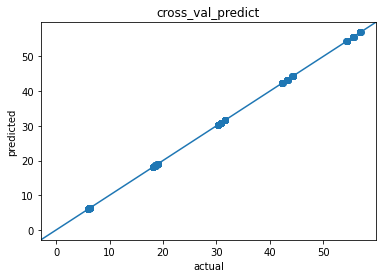

In [43]:
pp_occ_mean_noq_poly_results = fit_summarize_mm('pp_occ_mean_noq_poly', X_pp_noq, y_pp_occ_mean, scale=False, flavor='poly')
pp_occ_mean_noq_poly_results['coeffs_df']

In [130]:
pp_occ_mean_noq_poly_results['metrics_df']

,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_r2,train_r2
0,-0.028387,-0.024963,-0.000986,-0.001053,0.999993,0.999997
1,-0.026421,-0.025151,-0.001500,-0.000899,0.999996,0.999996
2,-0.024123,-0.026002,-0.000939,-0.001069,0.999997,0.999996
3,-0.027663,-0.024962,-0.000916,-0.001068,0.999994,0.999996
4,-0.026467,-0.025761,-0.001009,-0.001059,0.999997,0.999996


## Dev work that lead to function above

The `neg_` prefix indicates that it's the negative of MAE and MAPE. The reason for the negative sign is just so that during cross-validation, sklearn sorts results such that a higher score is better. Obviously, this isn't true for things like MAE, MSE, MAPE.

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']
partitions = ['test', 'train']
metric_names = [f"{p}_{s}" for s in scoring for p in partitions]
metric_names

### Build models for mean pp occupancy

In [ ]:
pp_lm_occ_mean_noq = LinearRegression()
scores_pp_occ_mean_noq = cross_validate(pp_lm_occ_mean_noq, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)
scores_pp_occ_mean_noq


## Testing LassoCV

In [ ]:
pp_lm_occ_mean_q_lassocv = make_pipeline(LassoCV(normalize=True, fit_intercept=True))

scores_pp_lm_occ_mean_q_lassocv = cross_validate(pp_lm_occ_mean_q_lassocv, X_pp_q, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)

scores_pp_lm_occ_mean_q_lassocv


In [ ]:
[estimator.named_steps['lassocv'].alpha_ for estimator in scores_pp_lm_occ_mean_q_lassocv['estimator']]

## Testing SVR

In [ ]:
pp_lm_occ_mean_q_svr = make_pipeline(SVR())

scores_pp_lm_occ_mean_q_svr = cross_validate(pp_lm_occ_mean_q_svr, X_pp_q, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)

scores_pp_lm_occ_mean_q_svr

In [ ]:
scaling_factors = np.array([list(estimator.named_steps['standardscaler'].scale_) for estimator in scores_pp_occ_mean_noq_lasso['estimator']])
print(scaling_factors)

The intercepts should all be zero since we didn't fit one.

In [ ]:
unscaled_intercepts = np.array([estimator.named_steps['lasso'].intercept_ for estimator in scores_pp_occ_mean_noq_lasso['estimator']])
print(unscaled_intercepts)

Now let's NOT scale the data and fit an intercept. Then we need to figure out how to go from scaled coeffs to unscaled coeffs.

In [ ]:
pp_lm_occ_mean_noq_lasso_us = make_pipeline(Lasso(alpha=1, fit_intercept=True))
# What if we use default score? - still get crazy r2 values
scores_pp_occ_mean_noq_lasso_us = cross_validate(pp_lm_occ_mean_noq_lasso_us, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                      cv=5, return_train_score=True, return_estimator=True)
#scores_pp_occ_mean_noq_lasso = cross_validate(pp_lm_occ_mean_noq_lasso, X_pp_noq, y_pp_occ_mean, 
#                       cv=5, return_train_score=True, return_estimator=True)
#scores_pp_occ_mean_noq_lasso
unscaled_coeffs = np.array([list(estimator.named_steps['lasso'].coef_) for estimator in scores_pp_occ_mean_noq_lasso_us['estimator']])
print(unscaled_coeffs)
print(unscaled_coeffs.shape)

In [ ]:
unscaled_intercepts = np.array([estimator.named_steps['lasso'].intercept_ for estimator in scores_pp_occ_mean_noq_lasso_us['estimator']])
print(unscaled_intercepts)
print(unscaled_intercepts.shape)

In [ ]:
print(scaled_coeffs / scaling_factors)

So, the values above are **close** to the `unscaled_coeffs` but not exactly. Makes me think we need to take the intercept into account somehow.

In [ ]:
pp_lm_occ_mean_noq_lasso = make_pipeline(Lasso(alpha=1, fit_intercept=False))
scores_pp_occ_mean_noq_lasso = cross_validate(pp_lm_occ_mean_noq_lasso, X_pp_noq, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)
scores_pp_occ_mean_noq_lasso


In [ ]:
var_names = X_pp_noq.columns.to_list()
print(var_names)
#for estimator in scores_noq['estimator']:
#    print(estimator.intercept_, estimator.coef_)

coeffs_pp_occ_mean_noq = [list(estimator.coef_) for estimator in scores_pp_occ_mean_noq['estimator']]
coeffs_pp_occ_mean_noq_df = pd.DataFrame(coeffs_pp_occ_mean_noq, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_noq['estimator']]

coeffs_pp_occ_mean_noq_df['intercept'] = intercept
coeffs_pp_occ_mean_noq_df

In [ ]:
[list(estimator.scale_) for estimator in scores_pp_occ_mean_noq['estimator']]

In [ ]:
metrics = {metric:scores_pp_occ_mean_noq[metric] for metric in metric_names}
metrics_pp_occ_mean_noq_df = pd.DataFrame(metrics)
metrics_pp_occ_mean_noq_df

In [ ]:
pp_occ_mean_noq_lasso_results = fit_summarize_lm('pp_occ_mean_noq_lm', X_pp_noq, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_noq_lasso_results['coeffs_df']

In [ ]:
pp_occ_mean_noq_lasso_results['metrics_df']

In [ ]:
pp_lm_occ_mean_q = LinearRegression()
scores_pp_occ_mean_q = cross_validate(pp_lm_occ_mean_q, X_pp_q, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_q.columns.to_list()

coeffs_pp_occ_mean_q = [list(estimator.coef_) for estimator in scores_pp_occ_mean_q['estimator']]
coeffs_pp_occ_mean_q_df = pd.DataFrame(coeffs_pp_occ_mean_q, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_q['estimator']]

coeffs_pp_occ_mean_q_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_mean_q[metric] for metric in metric_names}
metrics_pp_occ_mean_q_df = pd.DataFrame(metrics)


In [ ]:

coeffs_pp_occ_mean_q_df

In [ ]:

metrics_pp_occ_mean_q_df

In [ ]:
pp_occ_mean_q_lasso_results = fit_summarize_lm('pp_occ_mean_q_lm', X_pp_q, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_q_lasso_results['coeffs_df']

In [ ]:
pp_occ_mean_q_lasso_results['metrics_df']

In [ ]:
pp_lm_occ_mean_load = LinearRegression()
pp_lm_occ_mean_load_lasso = Lasso()
scores_pp_occ_mean_load = cross_validate(pp_lm_occ_mean_q, X_pp_load, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

scores_pp_occ_mean_load_lasso = cross_validate(pp_lm_occ_mean_q, X_pp_load, y_pp_occ_mean, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_load.columns.to_list()

coeffs_pp_occ_mean_load = [list(estimator.coef_) for estimator in scores_pp_occ_mean_load['estimator']]
coeffs_pp_occ_mean_load_df = pd.DataFrame(coeffs_pp_occ_mean_load, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_mean_load['estimator']]

coeffs_pp_occ_mean_load_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_mean_load[metric] for metric in metric_names}
metrics_pp_occ_mean_load_df = pd.DataFrame(metrics)


In [ ]:
coeffs_pp_occ_mean_load_df

In [ ]:
pp_occ_mean_load_lm_results = fit_summarize_lm('pp_occ_mean_load_lm', X_pp_load, y_pp_occ_mean, flavor='lm')
pp_occ_mean_load_lm_results['coeffs_df']

In [ ]:
pp_occ_mean_load_lasso_results = fit_summarize_lm('pp_occ_mean_load_lm', X_pp_load, y_pp_occ_mean, flavor='lasso')
pp_occ_mean_load_lasso_results['coeffs_df']

In [ ]:
metrics_pp_occ_mean_load_df

In [ ]:
coeffs_pp_occ_p95_q_df

## General function

# Occ p95 pp

In [ ]:
pp_lm_occ_p95_q = LinearRegression()
scores_pp_occ_p95_q = cross_validate(pp_lm_occ_p95_q, X_pp_q, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_q.columns.to_list()

coeffs_pp_occ_p95_q = [list(estimator.coef_) for estimator in scores_pp_occ_p95_q['estimator']]
coeffs_pp_occ_p95_q_df = pd.DataFrame(coeffs_pp_occ_p95_q, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_q['estimator']]

coeffs_pp_occ_p95_q_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_q[metric] for metric in metric_names}
metrics_pp_occ_p95_q_df = pd.DataFrame(metrics)


In [ ]:
coeffs_pp_occ_p95_q_df

In [ ]:
metrics_pp_occ_p95_q_df

In [ ]:
pp_lm_occ_p95_noq = LinearRegression()
scores_pp_occ_p95_noq = cross_validate(pp_lm_occ_p95_noq, X_pp_noq, y_pp_occ_p95, scoring=scoring,
                       cv=5, return_train_score=True, return_estimator=True)

var_names = X_pp_noq.columns.to_list()

coeffs_pp_occ_p95_noq = [list(estimator.coef_) for estimator in scores_pp_occ_p95_noq['estimator']]
coeffs_pp_occ_p95_noq_df = pd.DataFrame(coeffs_pp_occ_p95_noq, columns=var_names)

intercept = [estimator.intercept_ for estimator in scores_pp_occ_p95_noq['estimator']]

coeffs_pp_occ_p95_noq_df['intercept'] = intercept

metrics = {metric:scores_pp_occ_p95_noq[metric] for metric in metric_names}
metrics_pp_occ_p95_noq_df = pd.DataFrame(metrics)


In [ ]:
coeffs_pp_occ_p95_noq_df

In [ ]:
metrics_pp_occ_p95_noq_df

In [ ]:
pp_lm_occ_mean.coef_

In [ ]:
pp_lm_occ_mean.predict(X_pp_noq)

In [ ]:
plt.scatter(y_pp_occ_mean, pp_lm_occ_mean.predict(X_pp_noq))

In [ ]:
plt.scatter(y_pp_occ_p95, pp_lm_occ_p95.predict(X_pp_noq))

In [ ]:
scores = cross_val_score(pp_lm, X_pp_noq, y_pp_occ_mean, cv=5)

In [ ]:
scores

In [ ]:
y_mean_pct_blocked_by_pp
pp_lm_occ_p95 = LinearRegression()

pp_lm_occ_p95.fit(X_pp_noq, y_pp_occ_p95)

print(f"Full dataset score: {pp_lm_occ_p95.score(X_pp_noq, y_pp_occ_p95):.3f}")